# Applied Data Analysis &amp; Interpretation:

In [1]:
import time

start_time = time.perf_counter()

### Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralBiclustering
from sklearn.decomposition import NMF, PCA
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

### Load &amp; Preprocess Data

In [4]:
# Load the dataset
authors_df = pd.read_csv('authors.csv')

# Rename the 'Unnamed: 0' column to 'Author'
authors_df.rename(columns={'Unnamed: 0': 'Author'}, inplace=True)

# Standardize the data
features = authors_df.columns[1:]
x = authors_df.loc[:, features].values
x = StandardScaler().fit_transform(x)

## Problem 1

### Author Texts Exploration

#### PCA (Principal Component Analysis)

In [5]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

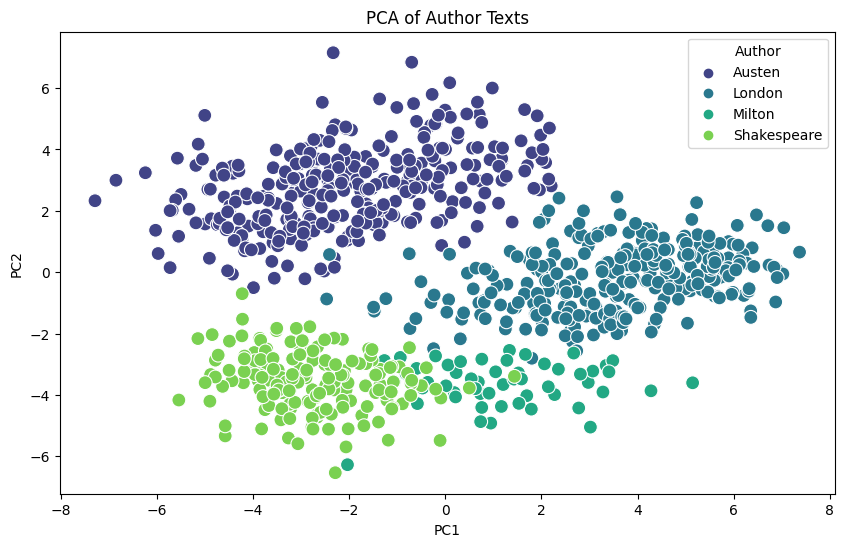

In [6]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='PC1', y='PC2', hue='Author', data=pd.concat([pca_df, authors_df[['Author']]], axis=1), s=100, palette='viridis')

plt.title('PCA of Author Texts')

plt.show()

#### t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [7]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)

tsne_results = tsne.fit_transform(x)

tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])

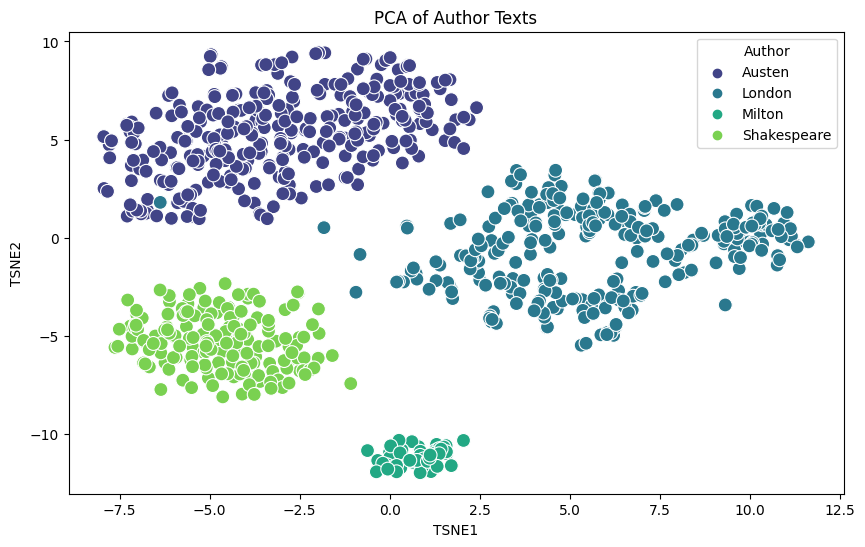

In [8]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='TSNE1', y='TSNE2', hue='Author', data=pd.concat([tsne_df, authors_df[['Author']]], axis=1), s=100, palette='viridis')

plt.title('PCA of Author Texts')

plt.show()

#### MDS (Multidimensional Scaling)

##### Using Euclidian Distance

In [9]:
euclidian_mds = MDS(n_components=2, max_iter=300, eps=1e-9, random_state=42)

euclidian_mds_results = euclidian_mds.fit_transform(x)

euclidian_mds_df = pd.DataFrame(data=euclidian_mds_results, columns=['MDS1', 'MDS2'])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


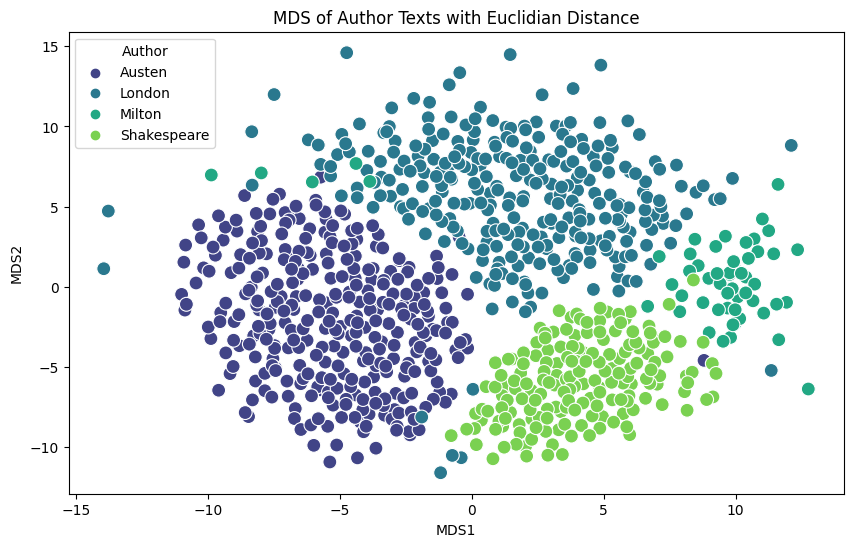

In [10]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='MDS1', y='MDS2', hue='Author', data=pd.concat([euclidian_mds_df, authors_df[['Author']]], axis=1), s=100, palette='viridis')

plt.title('MDS of Author Texts with Euclidian Distance')

plt.show()

##### Using Cosine Distance

In [11]:
mds_cosine = MDS(n_components=2, max_iter=300, eps=1e-9, random_state=42, dissimilarity='precomputed')

cosine_distances = 1 - (x @ x.T) / (np.linalg.norm(x, axis=1) * np.linalg.norm(x, axis=1)[:, np.newaxis])

cosine_mds_results = mds_cosine.fit_transform(cosine_distances)

euclidian_mds_df = pd.DataFrame(data=cosine_mds_results, columns=['MDS1', 'MDS2'])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


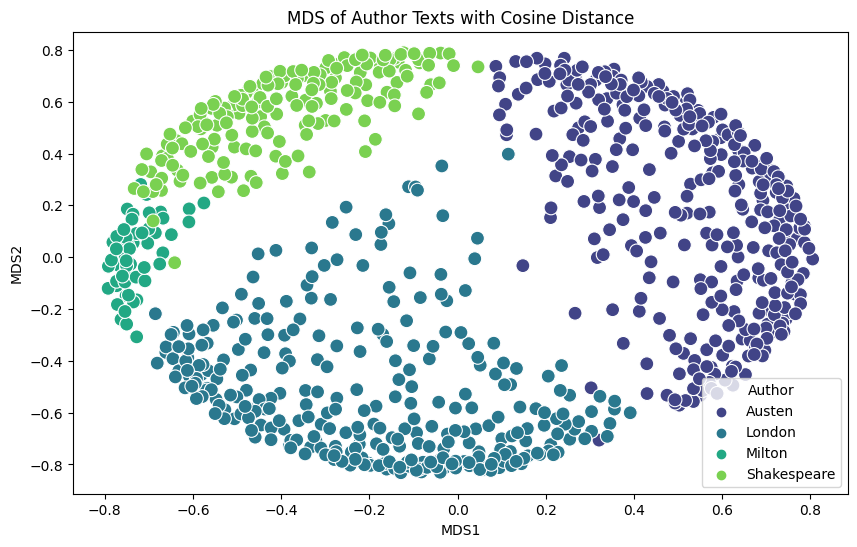

In [12]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='MDS1', y='MDS2', hue='Author', data=pd.concat([euclidian_mds_df, authors_df[['Author']]], axis=1), s=100, palette='viridis')

plt.title('MDS of Author Texts with Cosine Distance')

plt.show()

#### Graphical Model: NetworkX

In [13]:
cor_matrix = pd.DataFrame(x).corr()

graph = nx.from_numpy_array(cor_matrix.to_numpy())

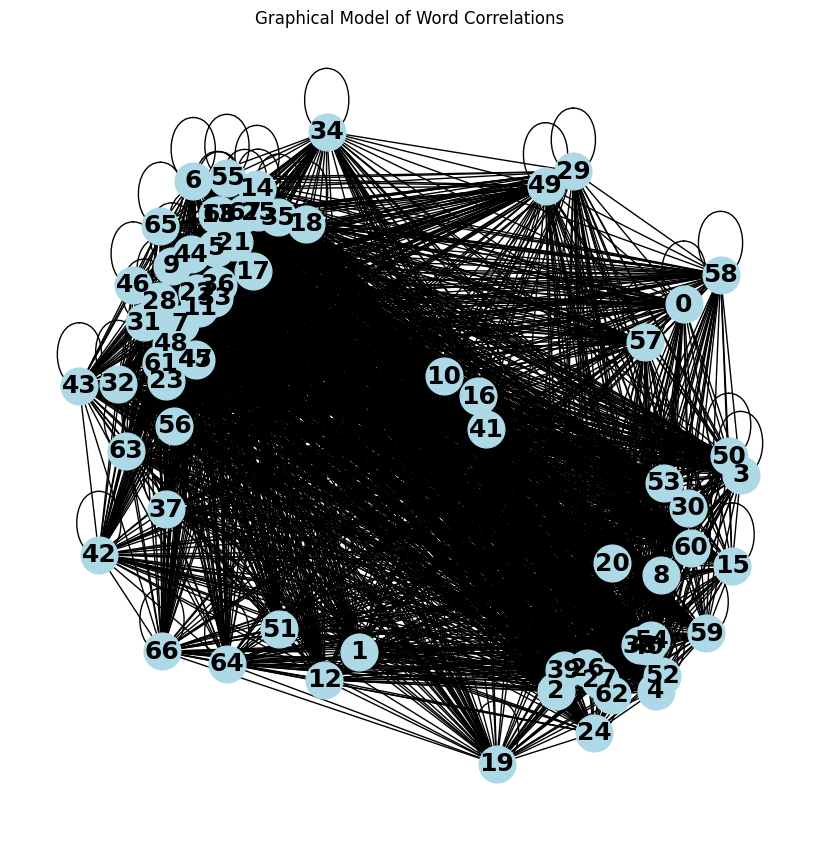

In [14]:
plt.figure(figsize=(8, 8))

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700, font_size=18)

plt.title("Graphical Model of Word Correlations")

plt.show()

#### Spectral Biclustering

In [15]:
biclustering = SpectralBiclustering(n_clusters=4, random_state=0)

biclustering.fit(x)

biclustered_data = x[np.argsort(biclustering.row_labels_)]

biclustered_data = biclustered_data[:, np.argsort(biclustering.column_labels_)]

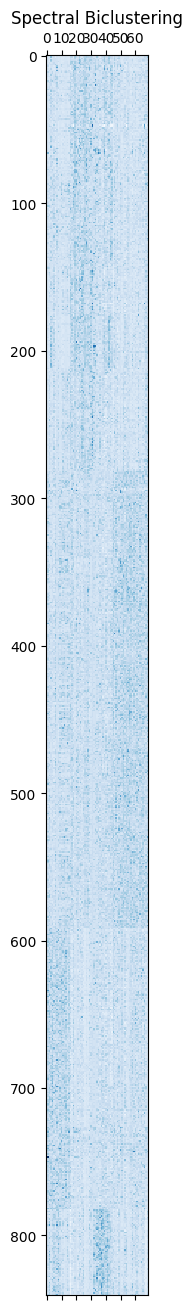

In [16]:
plt.matshow(biclustered_data, cmap=plt.cm.Blues)

plt.title("Spectral Biclustering")

plt.show()

#### NMF (Non-Negative Matrix Factorization)

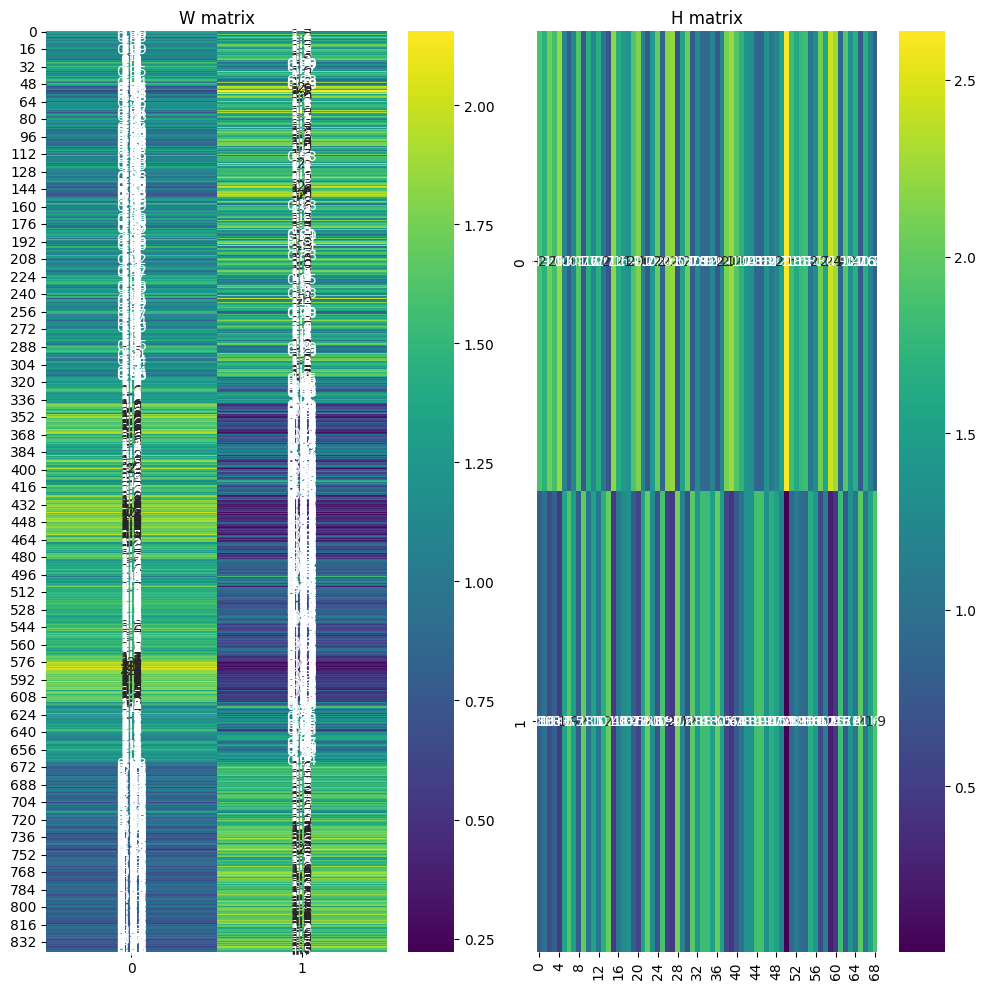

In [17]:
nmf = NMF(n_components=2, init='random', random_state=0)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('W matrix')
sns.heatmap(nmf.fit_transform(x - x.min()), annot=True, cmap='viridis')

plt.subplot(1, 2, 2)
plt.title('H matrix')
sns.heatmap(nmf.components_, annot=True, cmap='viridis')

plt.tight_layout()
plt.show()

#### Hierarchical Clustering

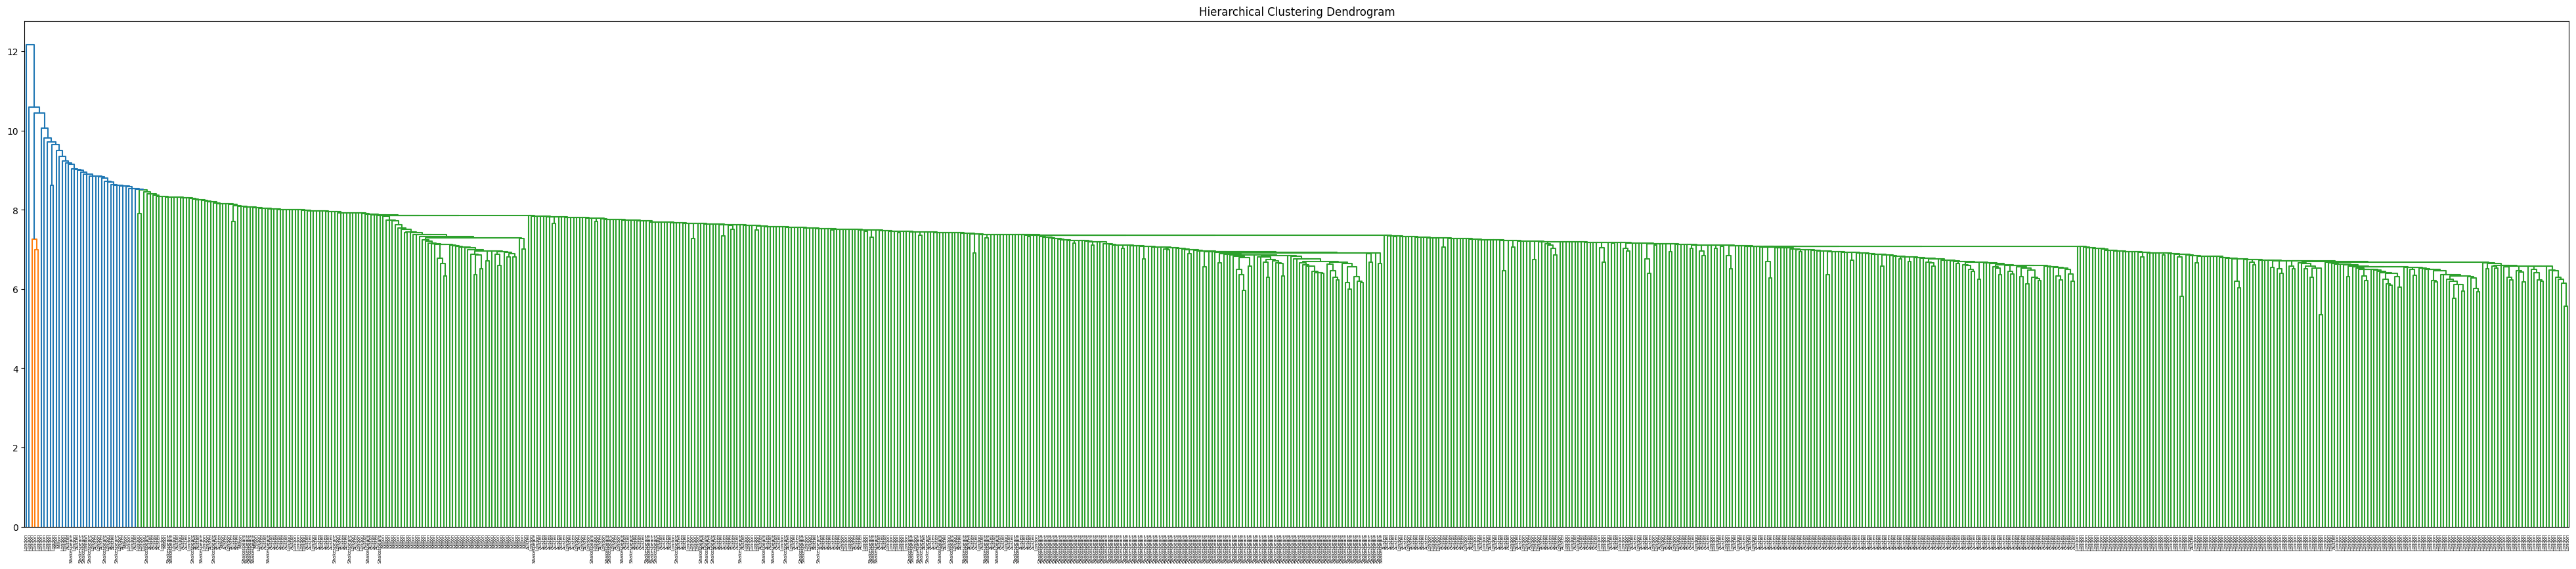

In [18]:
plt.figure(figsize=(50, 10))

dendrogram(linkage(x, 'single'), labels=authors_df['Author'].to_list())

plt.title("Hierarchical Clustering Dendrogram")

plt.show()

### Author Words Exploration

#### Transpose the data for word analysis

In [19]:
word_data = authors_df.drop('Author', axis=1).T

word_data.columns = authors_df['Author']

In [20]:
word_data.iloc[3:30]

Author  Austen  Austen  Austen  Austen  Austen  Austen  Austen  Austen  \
an           3       7       3       4       6       3      15       2   
and         66      44      40      64      52      42      44      67   
any          9       4       1       3       5       2       2       3   
are          4       3      13       3      14      15       6       6   
as          16      18      11      20      17      11      16      17   
at          13      16       9      13       6      14      14       4   
be          13       9      23      20      16      12      11      21   
been         4       3      11       7      12       6       5       4   
but          8       9      13      11       8      13      16       7   
by           8      14      13       6       9      12       9      13   
can          1       2       4       1       5       3       2       0   
do           0       5       7       1       3      17      11       2   
down         1       1       3       4       2       0       1       1   
even         5       2       0       0       0       1       0       2   
every        0       4       8       6       6       1       4       0   
for         21      14      15      20      17       9      14      15   
from        12       8       2       3       8       3       6       7   
had         16      14      12      26      10       6      11      18   
has          3       2       5       2       2       0       3       1   
have         6       6      20       4      19      15      13       2   
her         62      42      17      33      18      18      15      41   
his          3       1       9       4       4       9       6      14   
if           3       2       6       2       4      11       3       2   
in          30      22      31      26      38      15      17      21   
into         3       5       1       0       3       0       2       3   
is           9      11      16      12      12      21      10      13   
it          14      21      27      11      22      22      40      16   

Author  Austen  Austen  ...  Shakespeare  Shakespeare  Shakespeare  \
an           5       6  ...            3            9           10   
and         50      44  ...           43           45           38   
any          2       4  ...            1            5            3   
are          8       8  ...            0            3            5   
as           7      13  ...           11           21           20   
at          13      17  ...            1            7            1   
be           7      14  ...            6           20           15   
been         6       2  ...            3            1            2   
but         10      10  ...           11           12           13   
by          10       8  ...            8            5           12   
can          4       2  ...            3            4            3   
do           8       7  ...            0            7            1   
down         0       7  ...            1            2            1   
even         1       0  ...            0            0            1   
every        2       0  ...            1            2            0   
for         14      15  ...           26           11           23   
from         8       2  ...            6            1            1   
had         15       7  ...            1            4            0   
has          3       1  ...            0            0            0   
have        15       7  ...            6            9            5   
her         37      29  ...            9           11            0   
his          4      19  ...           12            9            8   
if           5       5  ...            3            7            4   
in          24      36  ...           23           19           19   
into         3       2  ...            0            1            1   
is          15      18  ...           24           32           14   
it          23      20  ...          

##### Standardize the word data

In [21]:
word_data_standardized = StandardScaler().fit_transform(word_data)

#### PCA (Principal Component Analysis)

In [22]:
pca_words = PCA(n_components=2)

pca_results_words = pca_words.fit_transform(word_data_standardized)

pca_words_df = pd.DataFrame(data=pca_results_words, columns=['PC1', 'PC2'])

final_pca_words_df = pd.concat([pca_words_df, pd.DataFrame({'Word': word_data.index})], axis=1)

<ipython-input-23-3fb8b00eaeb0>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=final_pca_words_df, s=100, palette='viridis')


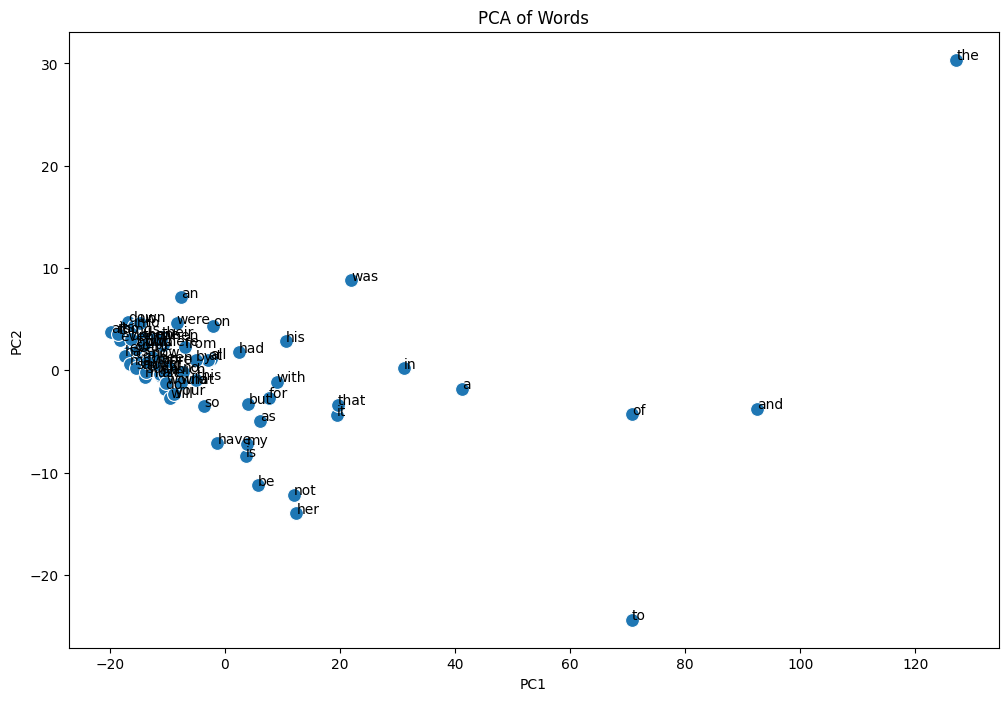

In [23]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='PC1', y='PC2', data=final_pca_words_df, s=100, palette='viridis')

for i, word in enumerate(final_pca_words_df['Word']):
    plt.annotate(word, (final_pca_words_df.loc[i, 'PC1'], final_pca_words_df.loc[i, 'PC2']))

plt.title('PCA of Words')

plt.show()

#### t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [24]:
tsne_words = TSNE(n_components=2, perplexity=15, n_iter=300)

tsne_words_results = tsne_words.fit_transform(word_data_standardized)

tsne_words_df = pd.DataFrame(data=tsne_words_results, columns=['TSNE1', 'TSNE2'])

final_tsne_words_df = pd.concat([tsne_words_df, pd.DataFrame({'Word': word_data.index})], axis=1)

<ipython-input-25-a8a30b046d94>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='TSNE1', y='TSNE2', data=final_tsne_words_df, s=100, palette='viridis')


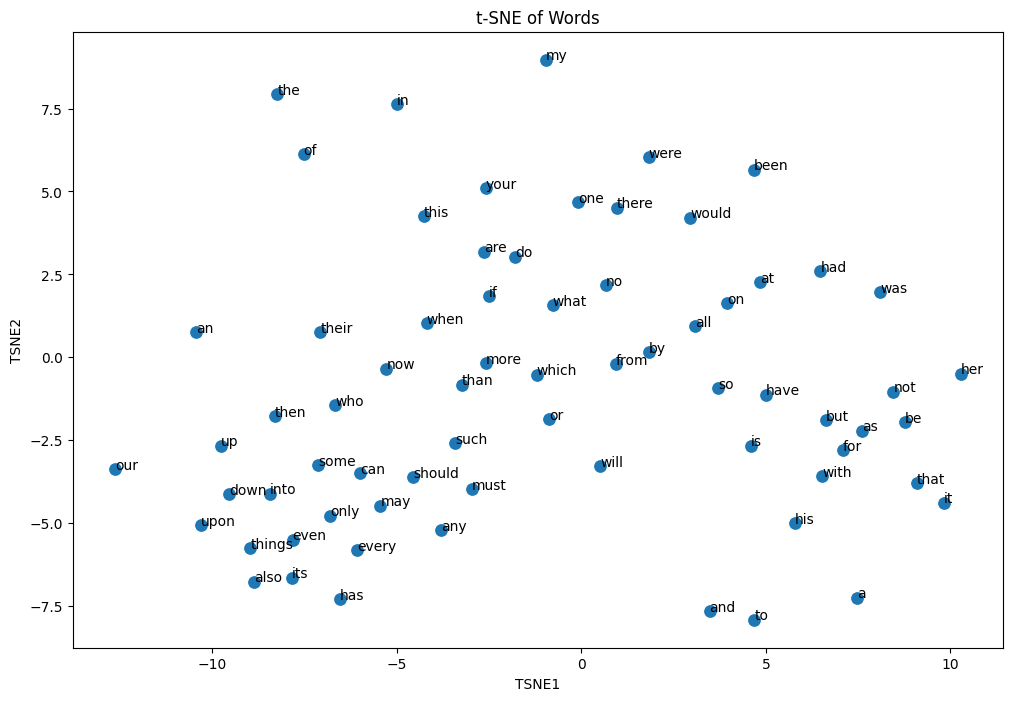

In [25]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='TSNE1', y='TSNE2', data=final_tsne_words_df, s=100, palette='viridis')

for i, word in enumerate(final_tsne_words_df['Word']):

    plt.annotate(word, (final_tsne_words_df.loc[i, 'TSNE1'], final_tsne_words_df.loc[i, 'TSNE2']))
plt.title('t-SNE of Words')
plt.show()

#### MDS (Multidimensional Scaling)

##### Using Euclidian Distance

In [26]:
euclidian_mds_words = MDS(n_components=2, max_iter=300, eps=1e-9, random_state=42)

euclidian_mds_words_results = euclidian_mds_words.fit_transform(word_data_standardized)

euclidian_mds_words_df = pd.DataFrame(data=euclidian_mds_words_results, columns=['MDS1', 'MDS2'])

final_euclidian_mds_words_df = pd.concat([euclidian_mds_words_df, pd.DataFrame({'Word': word_data.index})], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<ipython-input-27-cf172ee0d41d>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='MDS1', y='MDS2', data=final_euclidian_mds_words_df, s=100, palette='viridis')


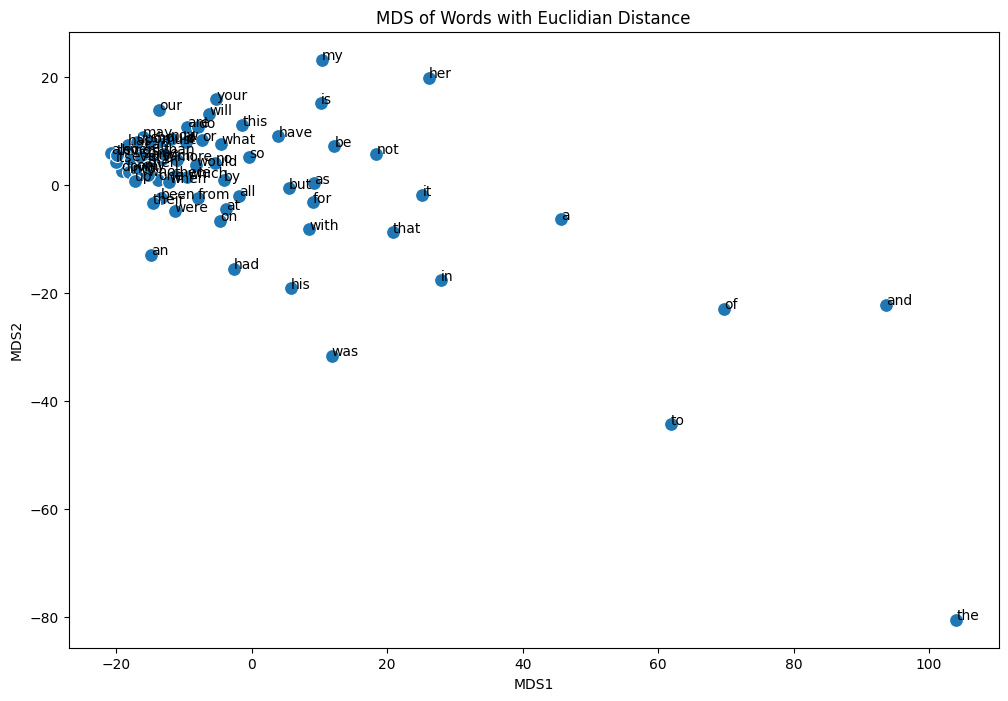

In [27]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='MDS1', y='MDS2', data=final_euclidian_mds_words_df, s=100, palette='viridis')

for i, word in enumerate(final_euclidian_mds_words_df['Word']):
    plt.annotate(word, (final_euclidian_mds_words_df.loc[i, 'MDS1'], final_euclidian_mds_words_df.loc[i, 'MDS2']))

plt.title('MDS of Words with Euclidian Distance')

plt.show()

##### Using Cosine Distance

In [28]:
cosine_mds_cosine_words = MDS(n_components=2, max_iter=300, eps=1e-9, random_state=42, dissimilarity='precomputed')

cosine_distances_words = pairwise_distances(word_data_standardized, metric='cosine')

cosine_mds_words_results = cosine_mds_cosine_words.fit_transform(cosine_distances_words)

cosine_mds_words_df = pd.DataFrame(data=cosine_mds_words_results, columns=['MDS1', 'MDS2'])

final_cosine_mds_words_df = pd.concat([cosine_mds_words_df, pd.DataFrame({'Word': word_data.index})], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<ipython-input-29-ef9ab8978bac>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='MDS1', y='MDS2', data=final_cosine_mds_words_df, s=100, palette='viridis')


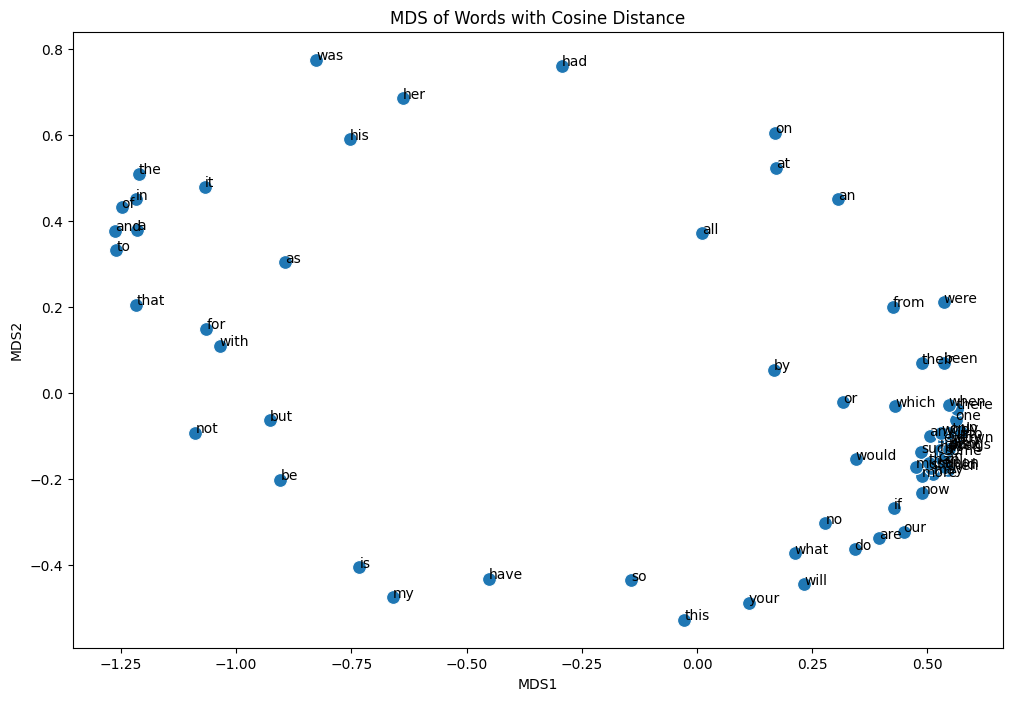

In [29]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='MDS1', y='MDS2', data=final_cosine_mds_words_df, s=100, palette='viridis')

for i, word in enumerate(final_cosine_mds_words_df['Word']):
    plt.annotate(word, (final_cosine_mds_words_df.loc[i, 'MDS1'], final_cosine_mds_words_df.loc[i, 'MDS2']))

plt.title('MDS of Words with Cosine Distance')

plt.show()

#### Graphical Model: NetworkX

In [30]:
cor_matrix_words = pd.DataFrame(word_data_standardized).corr()

graph_words = nx.from_numpy_array(cor_matrix_words.to_numpy())

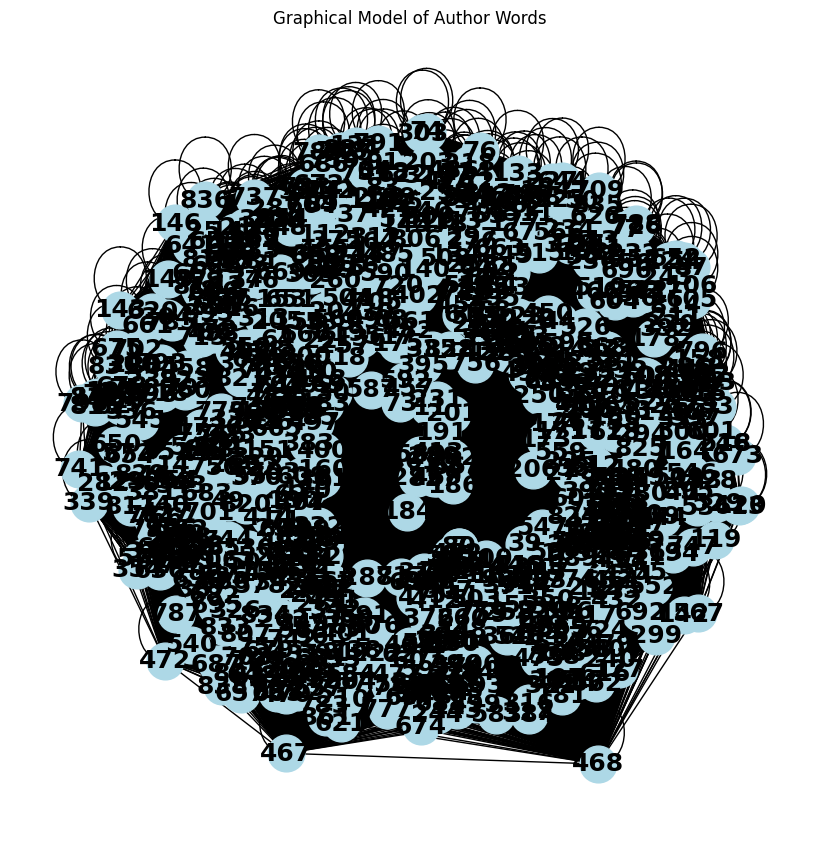

In [31]:
plt.figure(figsize=(8, 8))

pos_words = nx.spring_layout(graph_words)

nx.draw(graph_words, pos_words, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700, font_size=18)

plt.title("Graphical Model of Author Words")

plt.show()

#### Spectral Biclustering

In [32]:
biclustering_words = SpectralBiclustering(n_clusters=4, random_state=0)

biclustering_words.fit(word_data_standardized)

biclustered_data_words = word_data_standardized[np.argsort(biclustering_words.row_labels_)]

biclustered_data_words = biclustered_data_words[:, np.argsort(biclustering_words.column_labels_)]

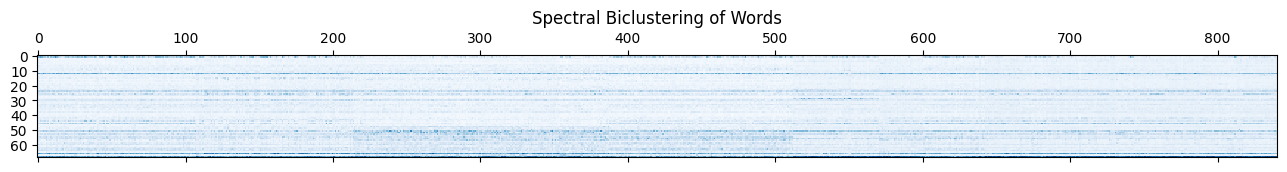

In [33]:
plt.matshow(biclustered_data_words, cmap=plt.cm.Blues)

plt.title("Spectral Biclustering of Words")

plt.show()

#### NMF (Non-Negative Matrix Factorization)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


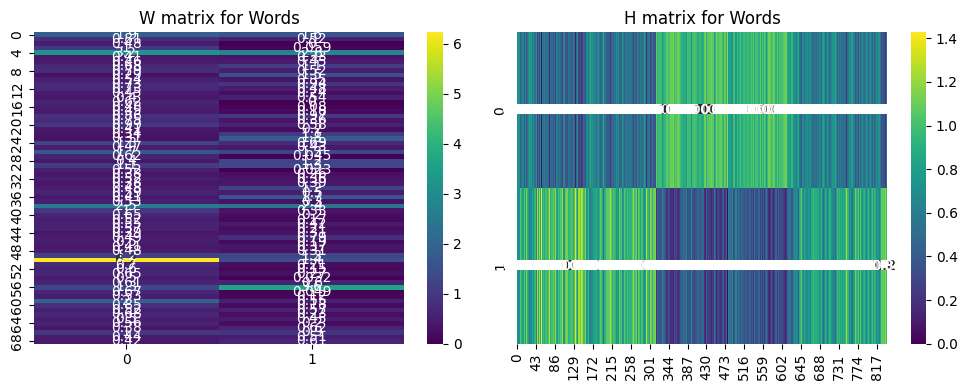

In [34]:
nmf_words = NMF(n_components=2, init='random', random_state=0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('W matrix for Words')
sns.heatmap(nmf_words.fit_transform(word_data_standardized - word_data_standardized.min()), annot=True, cmap='viridis')

plt.subplot(1, 2, 2)
plt.title('H matrix for Words')
sns.heatmap(nmf_words.components_, annot=True, cmap='viridis')

plt.tight_layout()
plt.show()

#### Hierarchical Clustering

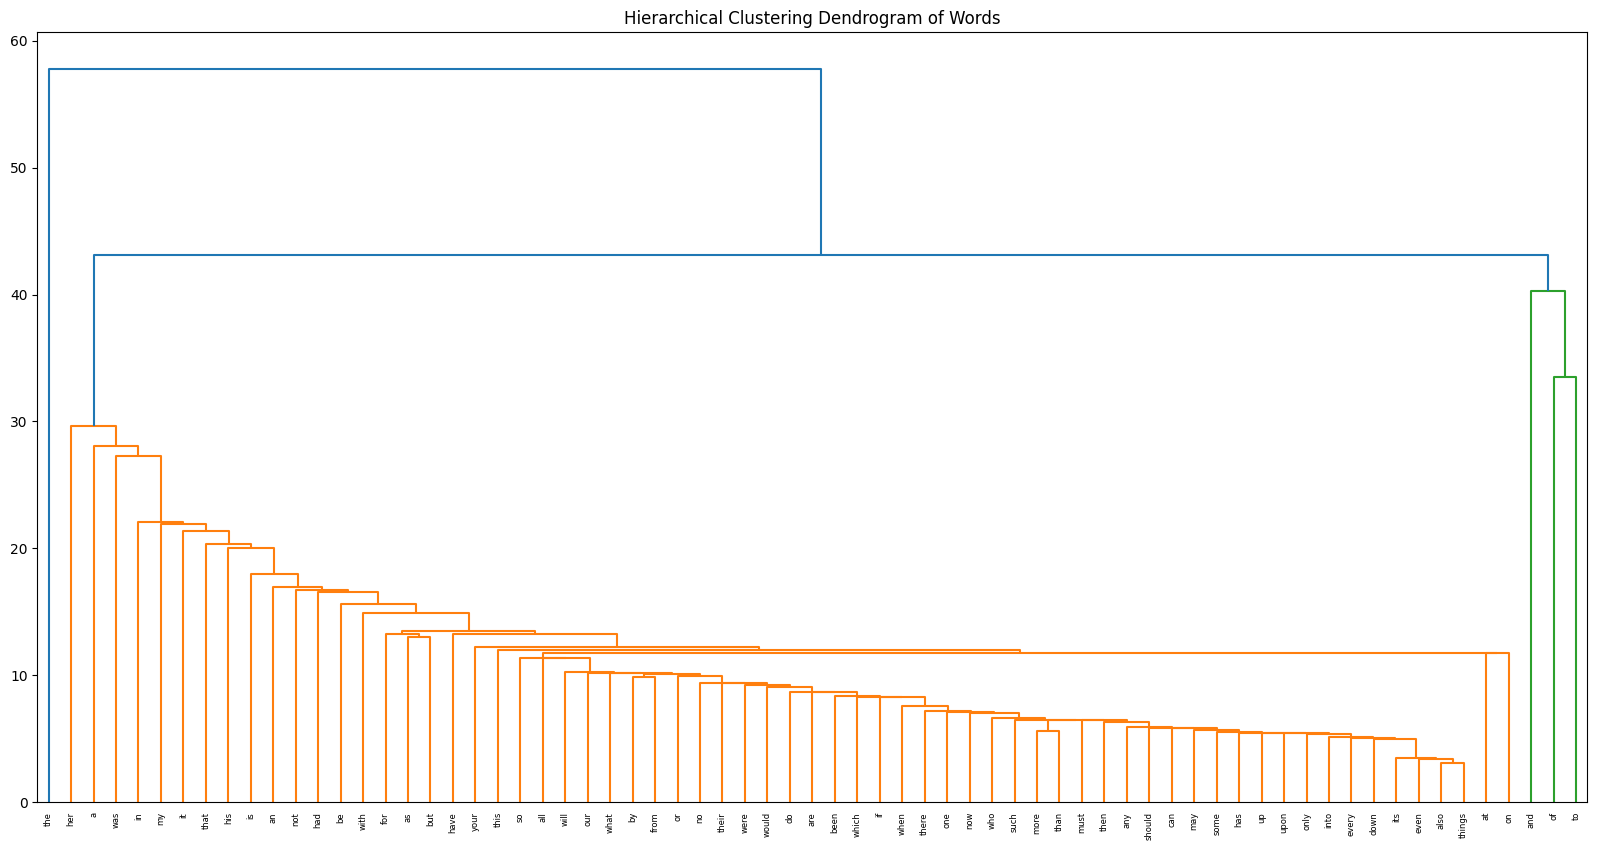

In [35]:
plt.figure(figsize=(20, 10))

dendrogram(linkage(word_data_standardized, 'single'), labels=word_data.index.to_list())

plt.title("Hierarchical Clustering Dendrogram of Words")

plt.show()

### Text &amp; Words Simultaneous Exploration

#### PCA (Principal Component Analysis)

In [36]:
authors_combo_pca = PCA(n_components=2)

authors_reduced_pca = authors_combo_pca.fit_transform(x)

authors_combo_pca_df = pd.DataFrame(authors_reduced_pca, columns=['PC1', 'PC2'])

authors_combo_pca_df['Type'] = 'Author'

In [37]:
words_combo_pca = PCA(n_components=2)

words_reduced_pca = words_combo_pca.fit_transform(x.T)

words_combo_pca_df = pd.DataFrame(words_reduced_pca, columns=['PC1', 'PC2'])

words_combo_pca_df['Type'] = 'Word'

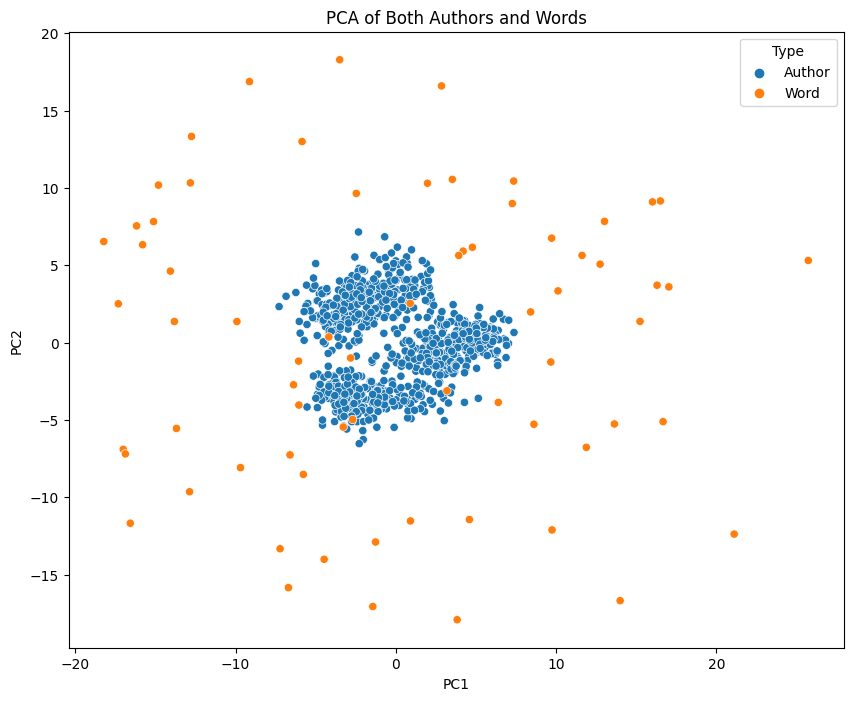

In [38]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=pd.concat([authors_combo_pca_df, words_combo_pca_df]), x='PC1', y='PC2', hue='Type')

plt.title('PCA of Both Authors and Words')

plt.show()

#### t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [39]:
authors_combo_tsne = TSNE(n_components=2, random_state=0)

authors_reduced_tsne = authors_combo_tsne.fit_transform(x)

authors_combo_tsne_df = pd.DataFrame(authors_reduced_tsne, columns=['Dim1', 'Dim2'])

authors_combo_tsne_df['Type'] = 'Author'

In [40]:
words_combo_tsne = TSNE(n_components=2, random_state=0)

words_reduced_tsne = words_combo_tsne.fit_transform(x.T)

words_combo_tsne_df = pd.DataFrame(words_reduced_tsne, columns=['Dim1', 'Dim2'])

words_combo_tsne_df['Type'] = 'Word'

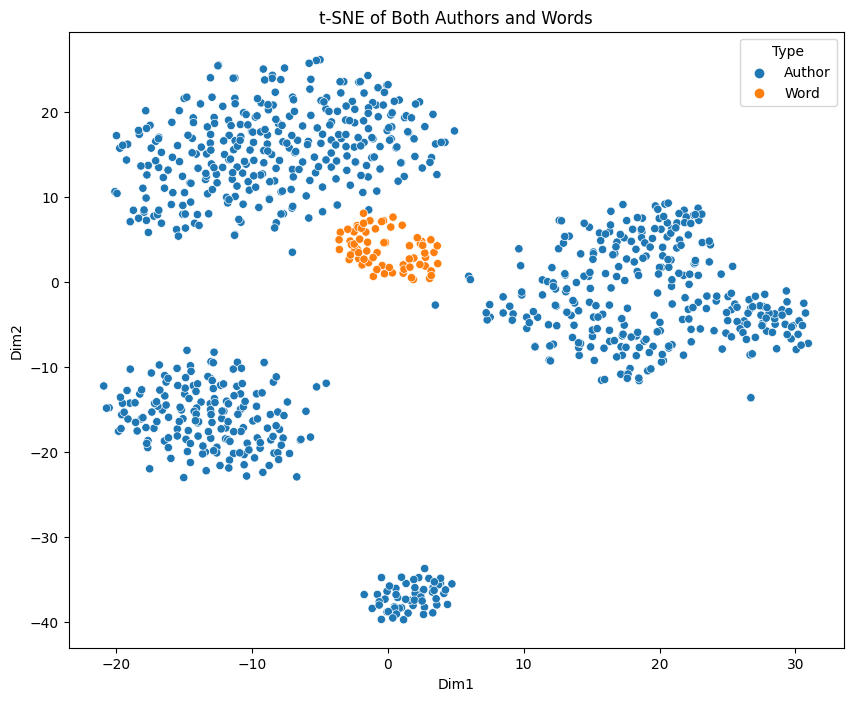

In [41]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=pd.concat([authors_combo_tsne_df, words_combo_tsne_df]), x='Dim1', y='Dim2', hue='Type')

plt.title('t-SNE of Both Authors and Words')

plt.show()

#### MDS (Multidimensional Scaling)

##### Using Euclidian Distance

In [42]:
authors_combo_euclidian_mds = MDS(n_components=2)

authors_reduced_mds = authors_combo_euclidian_mds.fit_transform(x)

authors_combo_mds_df = pd.DataFrame(authors_reduced_mds, columns=['Dim1', 'Dim2'])

authors_combo_mds_df['Type'] = 'Author'

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [43]:
words_combo_euclidian_mds = MDS(n_components=2)

words_reduced_mds = words_combo_euclidian_mds.fit_transform(x.T)

words_combo_mds_df = pd.DataFrame(words_reduced_mds, columns=['Dim1', 'Dim2'])

words_combo_mds_df['Type'] = 'Word'

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


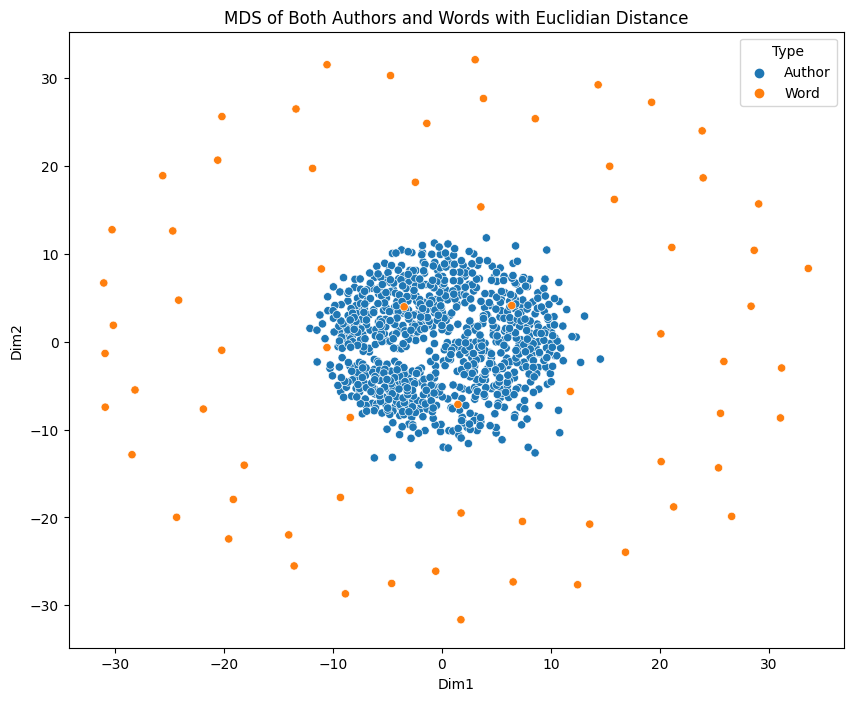

In [44]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=pd.concat([authors_combo_mds_df, words_combo_mds_df]), x='Dim1', y='Dim2', hue='Type')

plt.title('MDS of Both Authors and Words with Euclidian Distance')

plt.show()

##### Using Cosine Distance

In [45]:
authors_combo_cosine_distances = pairwise_distances(x, metric='cosine')

authors_combo_cosine_mds = MDS(n_components=2, dissimilarity='precomputed')

authors_combo_cosine_mds_results = authors_combo_cosine_mds.fit_transform(authors_combo_cosine_distances)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [46]:
words_combo_cosine_distances = pairwise_distances(x.T, metric='cosine')

words_combo_cosine_mds = MDS(n_components=2, dissimilarity='precomputed')

words_combo_cosine_mds_results = words_combo_cosine_mds.fit_transform(words_combo_cosine_distances)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [47]:
combined_cosine_mds_results = np.vstack([authors_combo_cosine_mds_results, words_combo_cosine_mds_results])

combined_cosine_mds_df = pd.DataFrame(combined_cosine_mds_results, columns=['Dim1', 'Dim2'])

combined_cosine_mds_df['Type'] = ['Author'] * x.shape[0] + ['Word'] * x.T.shape[0]

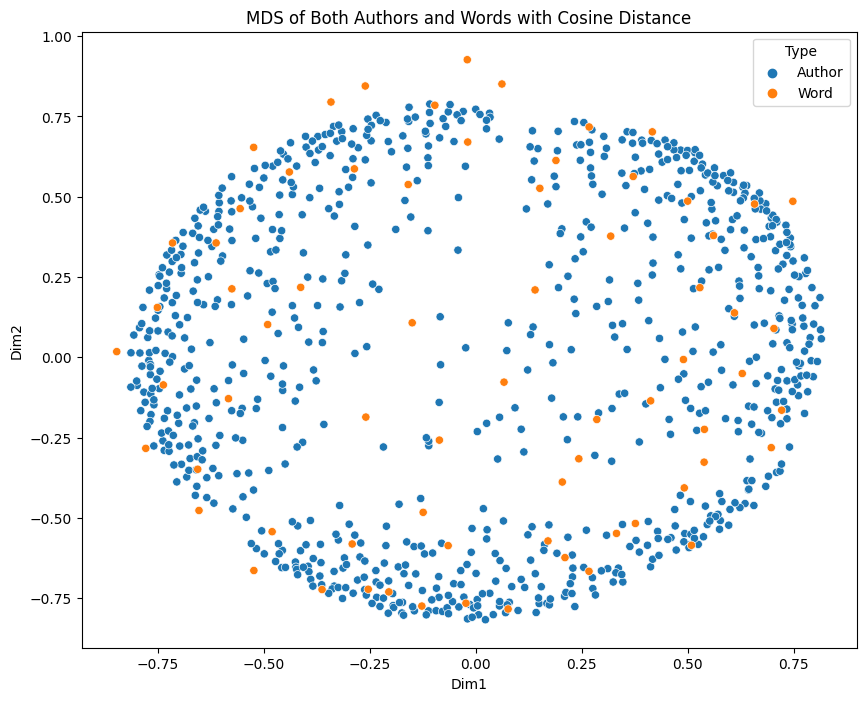

In [48]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=combined_cosine_mds_df, x='Dim1', y='Dim2', hue='Type')

plt.title('MDS of Both Authors and Words with Cosine Distance')

plt.show()

#### Graphical Model: NetworkX

##### Using Cosine distances for pairwise samples

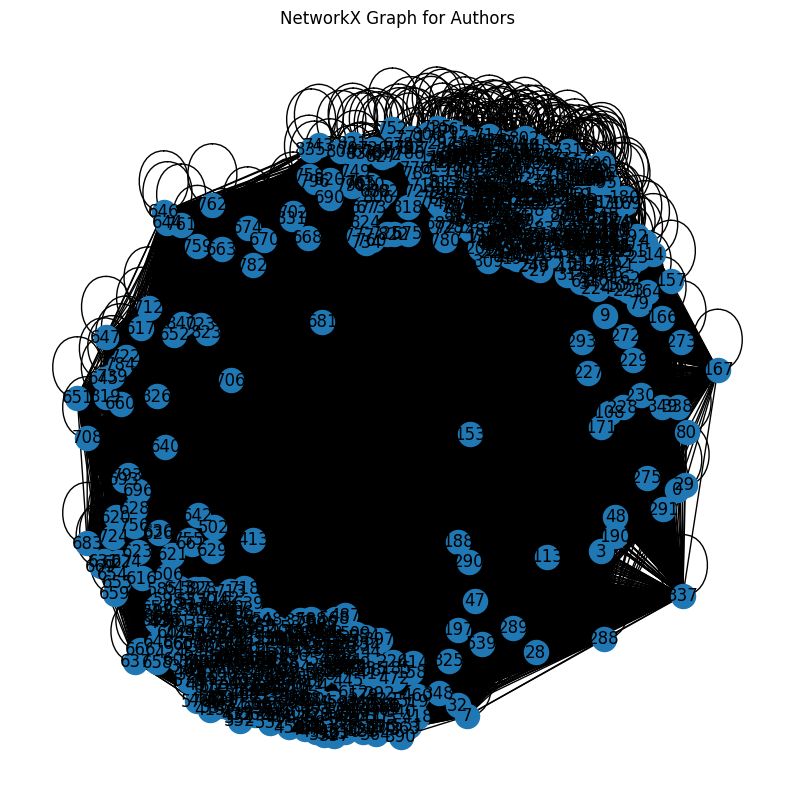

In [49]:
cosine_similarity_authors = 1 - pairwise_distances(x, metric='cosine')

authors_graph = nx.from_numpy_array(cosine_similarity_authors)

plt.figure(figsize=(10, 10))

plt.title('NetworkX Graph for Authors')

nx.draw(authors_graph, with_labels=True)
plt.show()

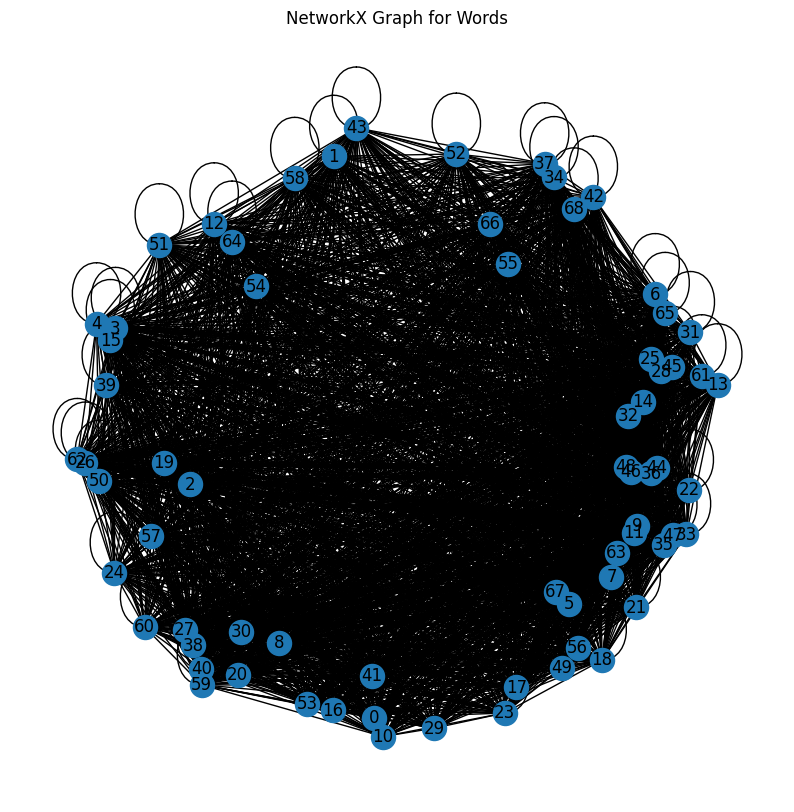

In [50]:
cosine_similarity_words = 1 - pairwise_distances(x.T, metric='cosine')

words_graph = nx.from_numpy_array(cosine_similarity_words)

plt.figure(figsize=(10, 10))

plt.title('NetworkX Graph for Words')

nx.draw(words_graph, with_labels=True)
plt.show()

##### Using Correlation coefficients

In [51]:
# combined_cor_matrix = np.corrcoef(combined_data, rowvar=False)

# combined_graph = nx.from_numpy_array(combined_cor_matrix)

In [52]:
# plt.figure(figsize=(10, 10))

# # combined_pos = nx.spring_layout(combined_graph)
# nx.draw(combined_graph, nx.spring_layout(combined_graph), with_labels=True)

# plt.title("Graphical Model of Combined Data")

# plt.show()

#### Spectral Biclustering

In [53]:
authors_combo_spectral_biclustering = SpectralBiclustering(n_clusters=4)

authors_combo_spectral_biclustering.fit(x)

words_combo_spectral_biclustering_words = SpectralBiclustering(n_clusters=69)

words_combo_spectral_biclustering_words.fit(x.T)

SpectralBiclustering(n_clusters=69)

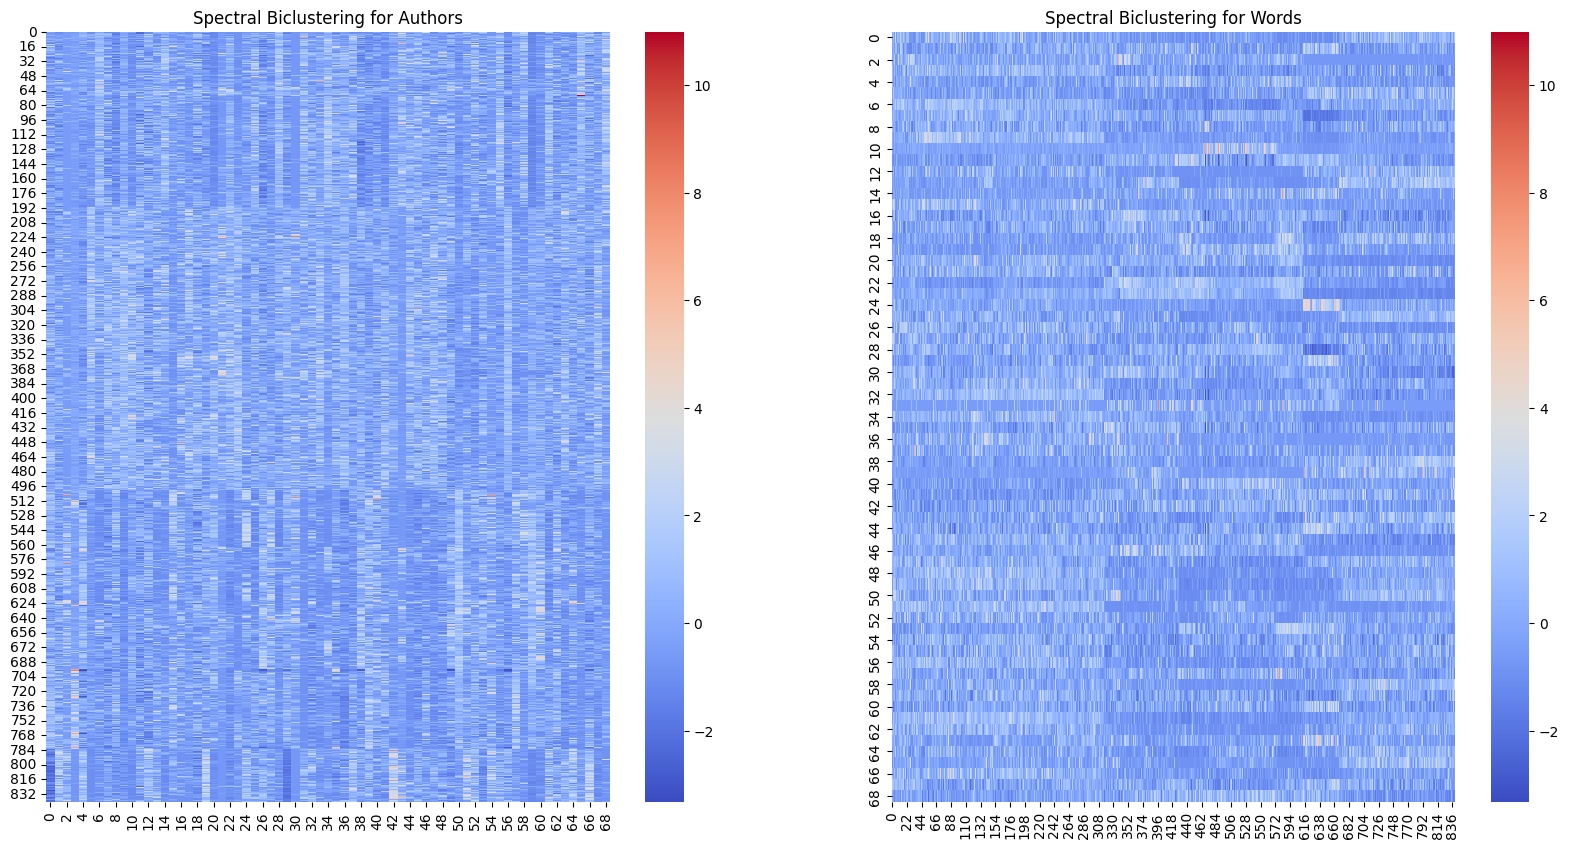

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(x[np.argsort(authors_combo_spectral_biclustering.row_labels_)], cmap='coolwarm', ax=axes[0])
axes[0].set_title('Spectral Biclustering for Authors')

sns.heatmap(x.T[np.argsort(words_combo_spectral_biclustering_words.row_labels_)], cmap='coolwarm', ax=axes[1])
axes[1].set_title('Spectral Biclustering for Words')

plt.show()

#### NMF (Non-Negative Matrix Factorization)

In [55]:
nmf_authors = NMF(n_components=2)
authors_combo_W = nmf_authors.fit_transform(x - x.min())

nmf_words = NMF(n_components=2)
words_combo_W = nmf_words.fit_transform(x.T - x.T.min())

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


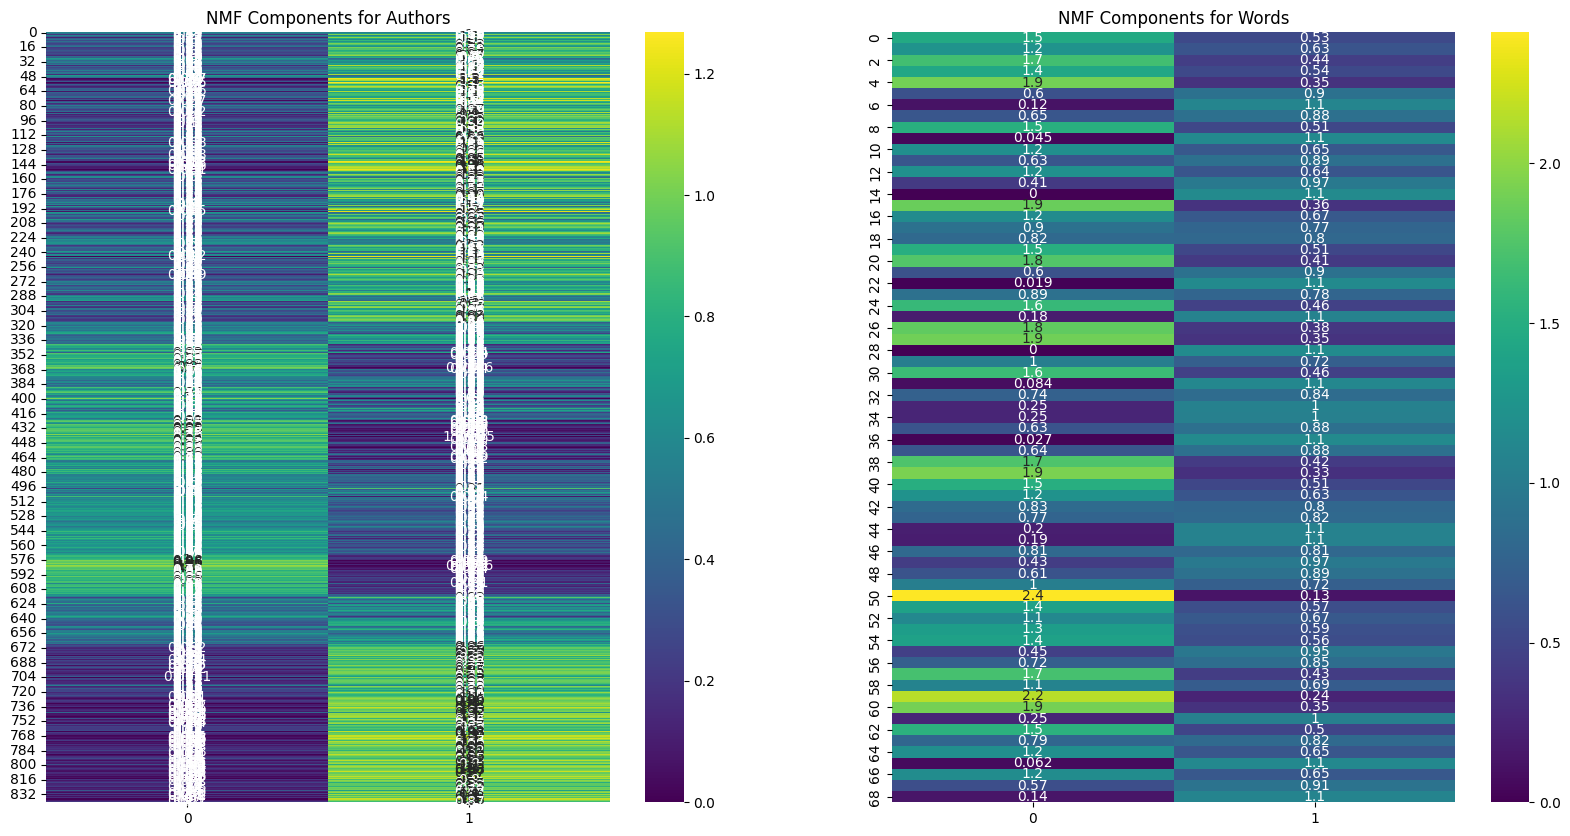

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(authors_combo_W, annot=True, cmap='viridis', ax=axes[0])
axes[0].set_title('NMF Components for Authors')

sns.heatmap(words_combo_W, annot=True, cmap='viridis', ax=axes[1])
axes[1].set_title('NMF Components for Words')

plt.show()

#### Hierarchical Clustering

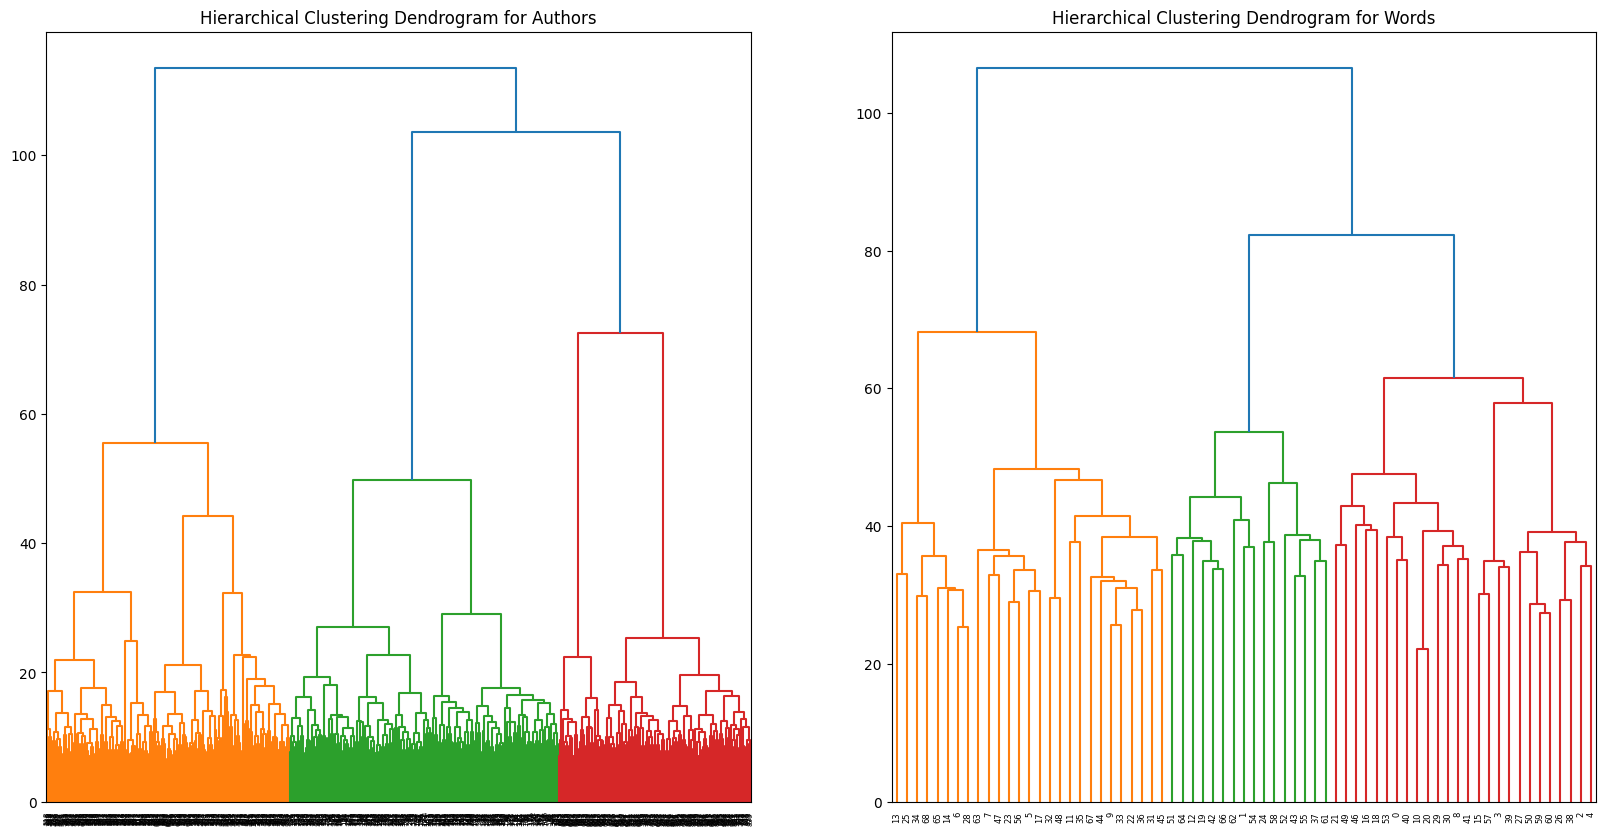

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

plt.sca(axes[0])
plt.title('Hierarchical Clustering Dendrogram for Authors')
dendrogram(linkage(x, method='ward'))

plt.sca(axes[1])
plt.title('Hierarchical Clustering Dendrogram for Words')
dendrogram(linkage(x.T, method='ward'))

plt.show()

## Problem 2

### Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler

### Data Loading &amp; Preprocessing

In [59]:
accuracies = {
    'Method': [],
    'Training Accuracy': [],
    'Testing Accuracy': [],
    'Cross-Validation Accuracy': []
}

In [60]:
authors_df = pd.read_csv('authors.csv')

if 'Book ID' in authors_df.columns:
    authors_df.drop(['Book ID'], axis=1, inplace=True)

authors_df.rename(columns={'Unnamed: 0': 'Author'}, inplace=True)
features = authors_df.drop('Author', axis=1)
labels = authors_df['Author']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_temp, X_test, y_temp, y_test = train_test_split(
    scaled_features, labels, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

# kf = KFold(n_splits=len(scaled_features), shuffle=True, random_state=42)
# kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### K-Means

In [61]:
# Since K-means doesn't know the actual labels, the cluster numbers won't necessarily correspond with the author labels.
# To evaluate the clustering accuracy, we need to map the cluster labels to the actual author labels.
# Mapping aligns the clusters with the actual authors to calculate the accuracy.
def map_labels(true_labels, cluster_labels):
    """
    Map cluster labels to actual labels for evaluation.
    """
    label_mapping = {}
    for cluster in np.unique(cluster_labels):
        # Find the most frequent actual label in each cluster
        most_frequent = pd.Series(true_labels[cluster_labels == cluster]).value_counts().idxmax()
        label_mapping[cluster] = most_frequent

    mapped_labels = np.array([label_mapping[label] for label in cluster_labels])

    return mapped_labels

In [62]:
accuracies['Method'].append('K-means')
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans_train_clusters = kmeans.fit_predict(X_train)
kmeans_test_clusters = kmeans.predict(X_test)

mapped_kmeans_train_labels = map_labels(y_train, kmeans_train_clusters)
mapped_kmeans_test_labels = map_labels(y_test, kmeans_test_clusters)

# print(f"K-means Train Accuracy: {accuracy_score(y_train, mapped_kmeans_train_labels)}")
# print(f"K-means Test Accuracy: {accuracy_score(y_test, mapped_kmeans_test_labels)}")
accuracies['Training Accuracy'].append(accuracy_score(y_train, mapped_kmeans_train_labels))
accuracies['Testing Accuracy'].append(accuracy_score(y_test, mapped_kmeans_test_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
kmeans_accuracies = []

for train_index, val_index in kf.split(scaled_features):
    kmeans = KMeans(n_clusters=4, random_state=42).fit(scaled_features[train_index])

    kmeans_val_clusters = kmeans.predict(scaled_features[val_index])

    kmeans_accuracies.append(
        accuracy_score(
            labels.iloc[val_index],
            map_labels(labels.iloc[val_index], kmeans_val_clusters)
        )
    )

accuracies['Cross-Validation Accuracy'].append(np.mean(kmeans_accuracies))
# print(f"K-means Cross-validated Accuracy: {np.mean(kmeans_accuracies)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### Hierarchical Clustering

In [64]:
linkage_methods = ['single', 'complete', 'average', 'ward']

hierarchical_train_accuracies = {}
hierarchical_test_accuracies = {}

for method in linkage_methods:
    accuracies['Method'].append(f'Hierarchical_{method}')
    Z_train = linkage(X_train, method=method)
    Z_test = linkage(X_test, method=method)

    hierarchical_train_clusters = fcluster(Z_train, t=4, criterion='maxclust')
    hierarchical_test_clusters = fcluster(Z_test, t=4, criterion='maxclust')

    mapped_hierarchical_train_labels = map_labels(y_train, hierarchical_train_clusters)
    mapped_hierarchical_test_labels = map_labels(y_test, hierarchical_test_clusters)

    # print(f"Hierarchical ({method}) Train Accuracy: {accuracy_score(y_train, mapped_hierarchical_train_labels)}")
    # print(f"Hierarchical ({method}) Test Accuracy: {accuracy_score(y_test, mapped_hierarchical_test_labels)}")

    hierarchical_train_accuracies[method] = accuracy_score(y_train, mapped_hierarchical_train_labels)
    hierarchical_test_accuracies[method] = accuracy_score(y_test, mapped_hierarchical_test_labels)
    accuracies['Training Accuracy'].append(accuracy_score(y_train, mapped_hierarchical_train_labels))
    accuracies['Testing Accuracy'].append(accuracy_score(y_test, mapped_hierarchical_test_labels))

In [65]:
linkage_methods = ['single', 'complete', 'average', 'ward']
hierarchical_method_accuracies = {}

for method in linkage_methods:
    hierarchical_accuracies = []

    for train_index, val_index in kf.split(scaled_features):
        Z = linkage(scaled_features[train_index], method=method)

        ward_val_clusters = fcluster(linkage(
            scaled_features[val_index], method=method), t=4, criterion='maxclust'
        )

        hierarchical_accuracies.append(
            accuracy_score(
                labels.iloc[val_index],
                map_labels(labels.iloc[val_index], ward_val_clusters)
            )
        )

    hierarchical_method_accuracies[method] = np.mean(hierarchical_accuracies)
    accuracies['Cross-Validation Accuracy'].append(np.mean(hierarchical_accuracies))
    # print(f"Hierarchical ({method}) Clustering Cross-validated Accuracy: {np.mean(hierarchical_accuracies)}")

### Spectral Clustering

In [66]:
spectral = SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors')

spectral_train_clusters = spectral.fit_predict(X_train)
spectral_test_clusters = spectral.fit_predict(X_test)

mapped_spectral_train_labels = map_labels(y_train, spectral_train_clusters)
mapped_spectral_test_labels = map_labels(y_test, spectral_test_clusters)

accuracies['Method'].append('Spectral Clustering')
accuracies['Training Accuracy'].append(accuracy_score(y_train, mapped_spectral_train_labels))
accuracies['Testing Accuracy'].append(accuracy_score(y_test, mapped_spectral_test_labels))
# print(f"Spectral Clustering Train Accuracy: {accuracy_score(y_train, mapped_spectral_train_labels)}")
# print(f"Spectral Clustering Test Accuracy: {accuracy_score(y_test, mapped_spectral_test_labels)}")

In [67]:
spectral_accuracies = []

for train_index, val_index in kf.split(scaled_features):
    spectral = SpectralClustering(
        n_clusters=4,
        random_state=42,
        affinity='nearest_neighbors').fit(scaled_features[train_index])

    spectral_val_clusters = spectral.fit_predict(scaled_features[val_index])

    spectral_accuracies.append(
        accuracy_score(
            labels.iloc[val_index],
            map_labels(labels.iloc[val_index], spectral_val_clusters)
        )
    )

accuracies['Cross-Validation Accuracy'].append(np.mean(spectral_accuracies))
# print(f"Spectral Clustering Cross-validated Accuracy: {np.mean(spectral_accuracies)}")

### Visualizations

In [68]:
df = pd.DataFrame(accuracies)

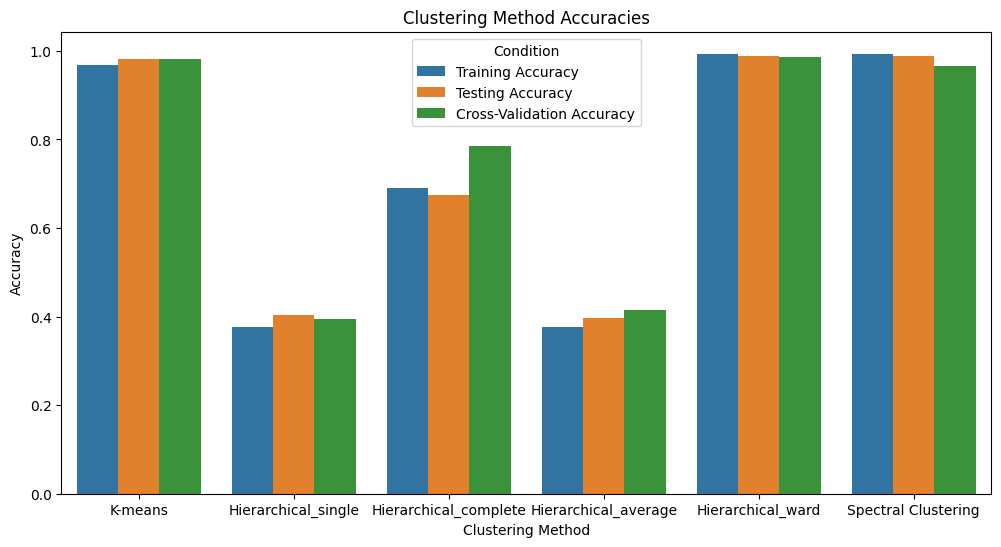

In [69]:
# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df.melt(id_vars='Method', var_name='Condition', value_name='Accuracy'),
            x='Method', y='Accuracy', hue='Condition')
plt.title('Clustering Method Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Clustering Method')
plt.show()

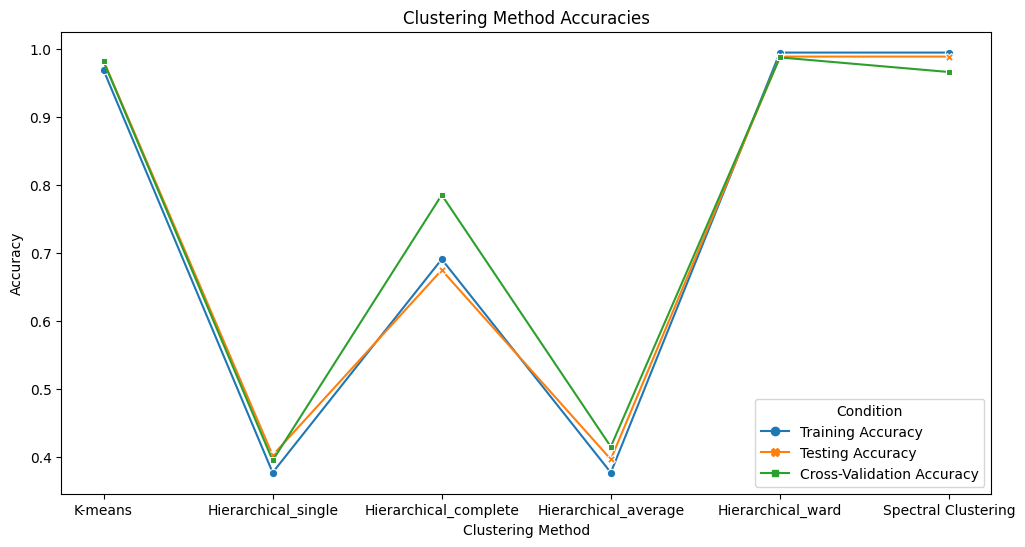

In [70]:
# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.melt(id_vars='Method', var_name='Condition', value_name='Accuracy'),
             x='Method', y='Accuracy', hue='Condition', style='Condition', markers=True, dashes=False)
plt.title('Clustering Method Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Clustering Method')
plt.show()

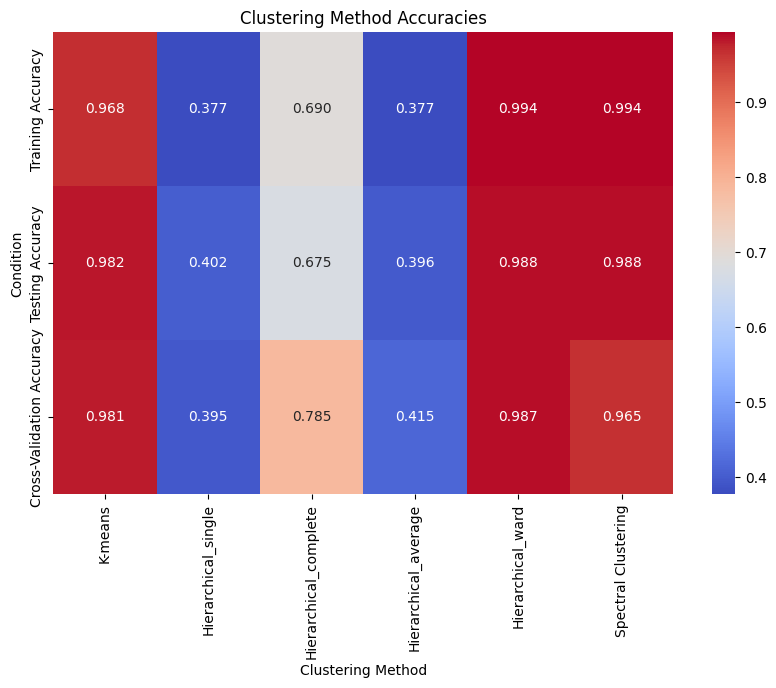

In [71]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Method').T, annot=True, cmap='coolwarm', cbar=True, fmt='.3f')
plt.title('Clustering Method Accuracies')
plt.ylabel('Condition')
plt.xlabel('Clustering Method')
plt.show()

### Interpretation &amp; Reflection

#### Interpretations:

1. **Differences in Linkage Criteria**: The significant discrepancy in accuracy between 'ward' linkage and the other linkage methods ('single', 'average', 'complete') in hierarchical clustering is noteworthy. 'Ward' minimizes the variance of the distances between clusters, which works exceptionally well with our dataset. In contrast, 'single' and 'average' linkages, which consider minimal inter-cluster distances and average inter-cluster distances, respectively, perform poorly. This result suggests that these methods better capture our data points' distribution. 'Complete' linkage, which considers maximum distances between clusters, offers moderate performance but needs to catch up to 'ward'.
2. **High Performance of K-Means and Spectral Clustering**: Both methods have performed exceptionally well, like 'ward' linkage in hierarchical clustering. This outcome suggests that the data is well-partitionable and that these algorithms effectively capture the underlying structure.
3. **Consistency Across Datasets**: The consistency in high performance across training, testing, and cross-validation for the top-performing methods indicates that the models are robust and likely to generalize well to new, unseen data.

#### Reflections:

1. **Choice of Linkage Method Matters**: The stark difference in performance between different linkage methods in hierarchical clustering underlines the importance of understanding the dataset's structure before choosing an algorithm or linkage method.
2. **Robustness of K-Means and Spectral Clustering**: The consistently high performance of K-Means and Spectral Clustering could make them go-to choices for similar text clustering tasks, especially when the data structure is not well-understood beforehand.
3. **Understanding Feature Importance**: Given the high accuracy, investigating which features contribute most to this performance may be worth investigating. Are there specific words or styles that are highly indicative of each author?
4. **Methodological Implications**: The poor performance of 'single' and 'average' linkages suggests that these should not be the default choice for this kind of data. This development has implications for anyone doing similar work and is a reminder that theoretical understanding and empirical testing should guide algorithmic choices.
5. **Future Work and Limitations**: While the results are promising, it would be interesting to explore how these clustering methods perform on a more diverse dataset or how they adapt to authors who may have varied writing styles across different works.
6. **Ethical and Practical Considerations**: As with any data science project that could lead to the identification of individuals, ethical considerations around data privacy and usage must be considered.

### Final Answer:

Hierarchical Clustering using 'ward' linkage is the best performing clustering method for our `authors` dataset.

Meanwhile, Spectral Clustering is a second option and K-Means Clustering would also be a third option.

All these three methods correctly predictions more than 96% of the time

## Problem 3

#### Importing Libraries

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from gensim.models import Word2Vec
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation, NMF, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud

#### Data Loading &amp; Preprocessing

In [73]:
authors_df = pd.read_csv('authors.csv')

if 'Book ID' in authors_df.columns:
    authors_df.drop(['Book ID'], axis=1, inplace=True)

authors_df.rename(columns={'Unnamed: 0': 'Author'}, inplace=True)
features = authors_df.drop('Author', axis=1)
labels = authors_df['Author']

In [74]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

### Term Frequency-Inverse Document Frequency (TF-IDF)

Why: TF-IDF can highlight words frequently used by a particular author but not commonly used across all authors, making those words more significant for clustering.

In [75]:
# 2. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(features.apply(lambda row: ' '.join(row.astype(str)), axis=1))
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Top 10 TF-IDF features
indices = np.argsort(tfidf_vectorizer.idf_)[::-1]
top_n = 10
top_features = [tfidf_feature_names[i] for i in indices[:top_n]]

In [76]:
# features.iloc[list(map(int, top_features))]

In [77]:
top_features

['144', '141', '128', '153', '131', '133', '150', '143', '105', '109']

* **Top Features**: The top TF-IDF features are ['144', '141', '128', '153', '131', '133', '150', '143', '105', '109'].
* **Interpretation**: These features correspond to specific but common words or phrases that are particularly distinctive in the dataset. The numerical nature suggests they might be encoded forms of the actual words. I still need to figure out the decoding of these features.

### Latent Dirichlet Allocation (LDA)

Why: Topic models can reveal the text corpus's latent structure and indicate what topics or words are important for each author. They are unsupervised methods that can complement the clustering analysis.

In [78]:
# 1. Topic Modeling using LDA and UNSCALED FEATURES (IMPORTANT TO DISTINGUISH)
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda_topics = lda.fit_transform(features)

# Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)] = ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

# Top 10 words for each topic
lda_top_words = display_topics(lda, features.columns, 10)

In [79]:
lda_top_words.to_csv('lda_top_10_words.csv')

In [80]:
lda_top_words

Topic 0 words Topic 1 words Topic 2 words Topic 3 words
0           the            to           the           and
1           and           her            of            to
2            of           the             a           the
3           was            of           and            of
4            to           and            it            my
5            in           was            in             a
6             a             a            an            is
7           his            it            to           not
8           had            in          that            in
9          that           had           was          that

<ipython-input-81-fabae23f02eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(lda_top_words[topic], rotation=45)
<ipython-input-81-fabae23f02eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(lda_top_words[topic], rotation=45)
<ipython-input-81-fabae23f02eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(lda_top_words[topic], rotation=45)
<ipython-input-81-fabae23f02eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(lda_top_words[topic], rotation=45)


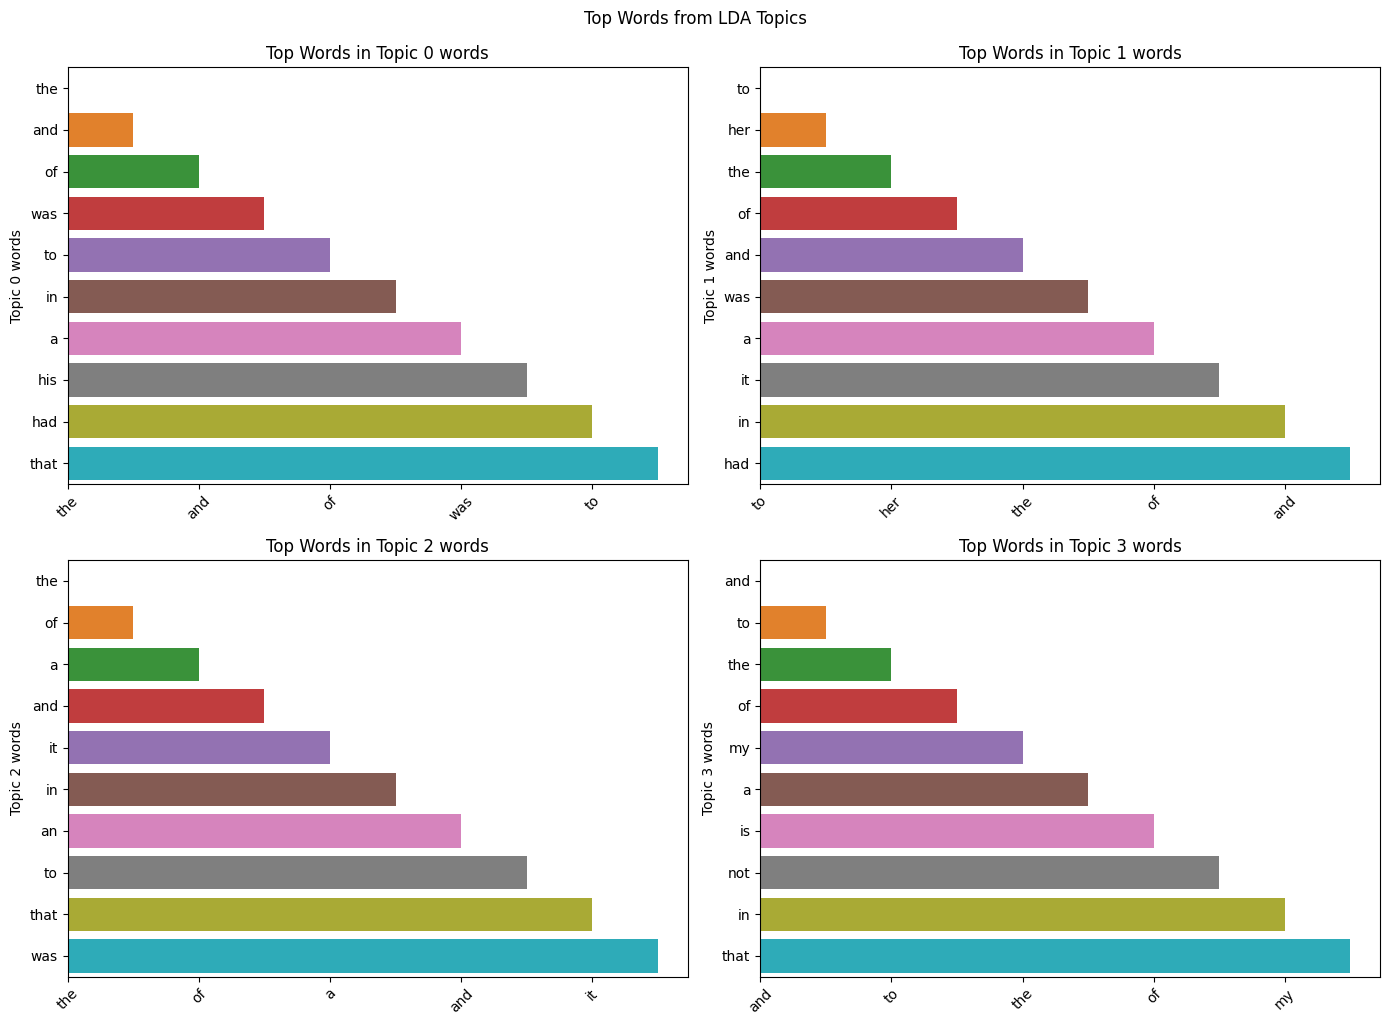

In [81]:
# Visualizing LDA Top Words
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()
for i, topic in enumerate(lda_top_words.columns):
    sns.barplot(x=lda_top_words.index, y=topic, data=lda_top_words, ax=axs[i])
    axs[i].set_title(f'Top Words in {topic}')
    axs[i].set_xticklabels(lda_top_words[topic], rotation=45)

plt.tight_layout()
plt.suptitle('Top Words from LDA Topics', y=1.02)
plt.show()

* **Top Words**: The LDA model highlights common English stop words such as 'the', 'and', 'of', 'to', 'was', and others as significant for each topic.
* **Interpretation**: It suggests that common words, often disregarded in text analytics, play a crucial role in the authorship of the texts. However, the overlap in the top terms across topics suggests a need for more precise differentiation among them.

### Word Embeddings

Why: Word embeddings capture both frequency and context/semantics, which could be important for distinguishing authors.

In [82]:
# 3. Word Embeddings - Word2Vec
# Note: Normally requires tokenized sentences, but I'll use words here for simplicity
vocabulary = features.columns.tolist()

sentences = features.apply(
    lambda row: [word for word in features.columns.tolist() for _ in range(row[word])],
    axis=1
).tolist()

# Train Word2Vec model
word2vec = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec.save("word2vec.model")
similar_words = word2vec.wv.most_similar('the', topn=10)
# Sample: Words closest to the word "the"
similar_words

[('that', 0.4770442545413971),
 ('their', 0.4635649025440216),
 ('then', 0.3132675886154175),
 ('there', 0.09898615628480911),
 ('your', 0.011908610351383686),
 ('all', 0.005176265724003315),
 ('may', 0.00460711307823658),
 ('an', -0.004321192856878042),
 ('also', -0.005281614139676094),
 ('her', -0.012551624327898026)]

#### Examine Cluster Centroids

In [83]:
def get_doc_vector(word2vec_model, doc_words):
    valid_words = [word for word in doc_words if word in word2vec_model.wv.index_to_key]
    if valid_words:
        return np.mean([word2vec_model.wv[word] for word in valid_words], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

doc_vectors = np.array([get_doc_vector(word2vec, words) for words in sentences])

In [84]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans_clusters = kmeans.fit_predict(doc_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
centroids = kmeans.cluster_centers_

In [86]:
def closest_words_to_centroid(word2vec_model, centroid, topn=10):
    similar_words = word2vec_model.wv.similar_by_vector(centroid, topn=topn)
    return [word for word, _ in similar_words]

words_close_to_centroids = [
    closest_words_to_centroid(word2vec, centroid)\
    for centroid in kmeans.cluster_centers_
]

In [87]:
words_close_to_centroids

[['the', 'that', 'their', 'and', 'an', 'of', 'all', 'also', 'any', 'then'],
 ['the', 'an', 'that', 'and', 'all', 'also', 'of', 'their', 'any', 'on'],
 ['the', 'of', 'and', 'to', 'an', 'her', 'now', 'that', 'all', 'up'],
 ['and', 'the', 'an', 'any', 'all', 'that', 'also', 'of', 'now', 'this']]

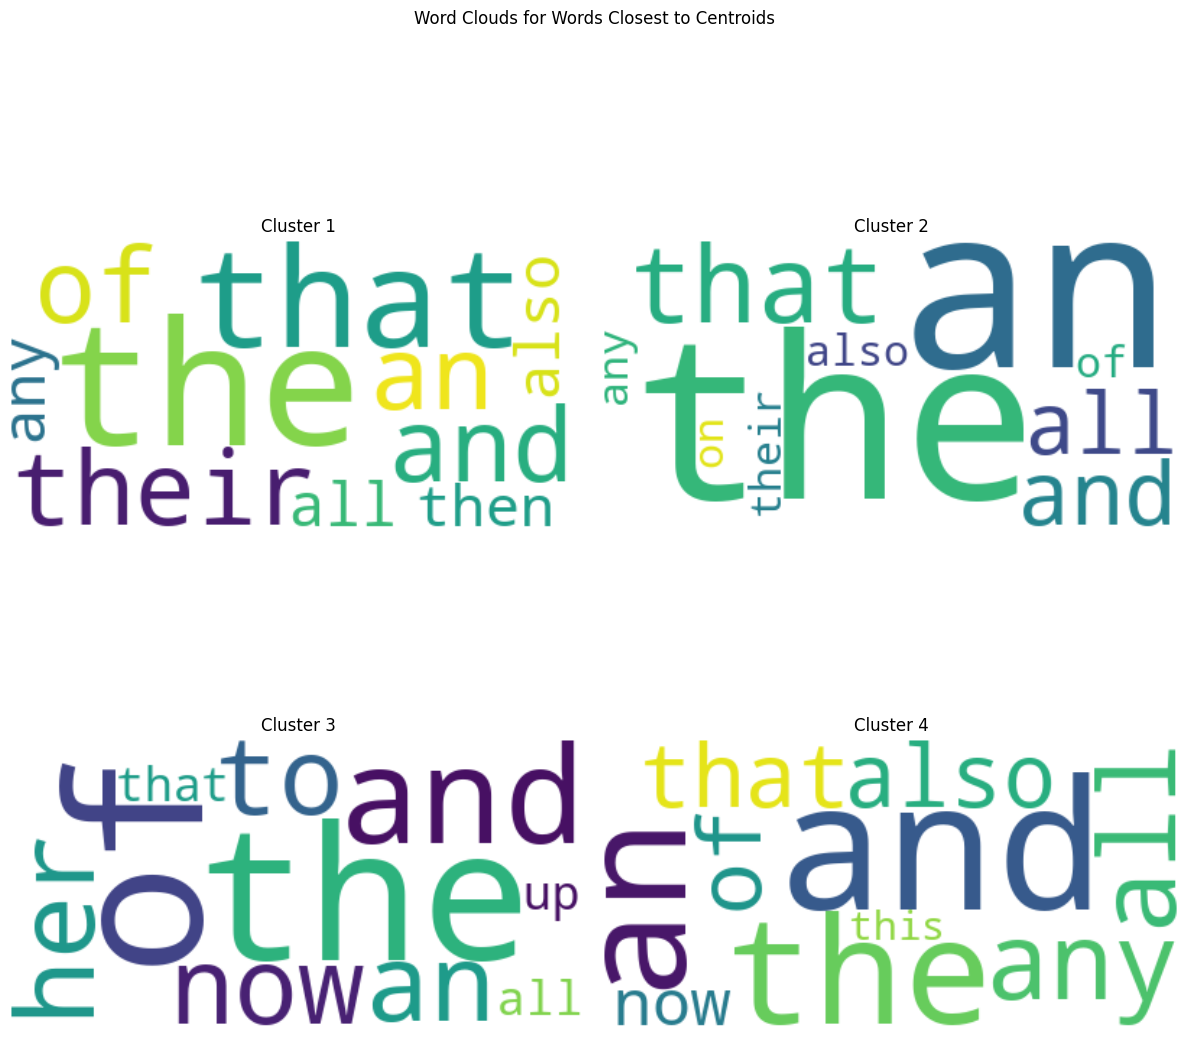

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.ravel()

for i, words in enumerate(words_close_to_centroids):
    # freq_dict = {word: 1 for word in words}
    wordcloud = WordCloud(
        background_color='white'
        ).generate_from_frequencies({word: 1 for word in words})
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Cluster {i+1}')
    axs[i].axis('off')

plt.tight_layout()
plt.suptitle('Word Clouds for Words Closest to Centroids', y=1.02)
plt.show()

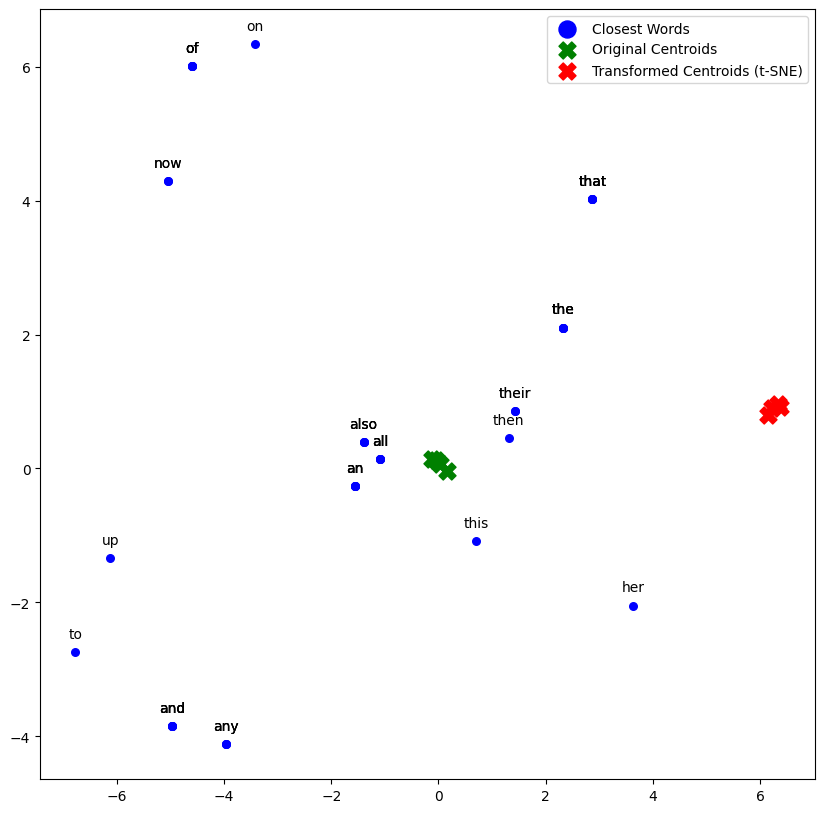

In [108]:
tsne = TSNE(n_components=2, random_state=42)

reduced_vectors = tsne.fit_transform(word2vec.wv.vectors)

# Map word to 2D coordinates
word_to_coord = {word: reduced_vectors[i] for i, word in enumerate(word2vec.wv.index_to_key)}

all_vectors = tsne.fit_transform(np.vstack((word2vec.wv.vectors, centroids)))

# Separate back into reduced word vectors and reduced centroids
reduced_word_vectors = all_vectors[:-len(centroids)]
reduced_centroids = all_vectors[-len(centroids):]

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter([], [], s=150, c='blue', label='Closest Words')
plt.scatter([], [], s=150, marker='X', c='green', label='Original Centroids')
plt.scatter([], [], s=150, marker='X', c='red', label='Transformed Centroids (t-SNE)')

for centroid in tsne.fit_transform(
    np.vstack((word2vec.wv.vectors, centroids)))[-len(centroids):]:
    plt.scatter(centroid[0], centroid[1], s=150, marker='X', c='red')

for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], s=150, marker='X', c='green')

# Plot words closest to centroids
for words in words_close_to_centroids:
    coords = [word_to_coord[word] for word in words if word in word_to_coord]
    xs, ys = zip(*coords)
    plt.scatter(xs, ys, s=30, c='blue')
    for i, word in enumerate(words):
        plt.annotate(word, (xs[i], ys[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()
plt.show()

* **Words Close to Centroids**: Common words like 'on', 'of', 'and', and others appear in all clusters.
* **Interpretation**: Much like the LDA results, standard words are vital features that help cluster the texts. They may capture subtle nuances in how different authors use these familiar words.

### Principal Component Analysis (PCA)

Why: If you're using PCA along with clustering, examining the principal components can provide insight into which original features drive the variance and, therefore, the clustering.

In [90]:
# 4. PCA for Feature Importance
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Top features (words) contributing to principal components
pca_top_features = pd.DataFrame(pca.components_, columns=features.columns, index=['PC-1', 'PC-2']).T

In [91]:
pca_top_features.to_csv('pca_top_features.csv')

In [92]:
pca_top_features

PC-1      PC-2
a      0.063825  0.097628
all    0.031371 -0.023197
also   0.111600  0.007176
an     0.076413  0.000146
and    0.156590 -0.032675
...         ...       ...
who    0.019217 -0.011733
will  -0.181833 -0.088755
with   0.026165 -0.080726
would -0.121334  0.186375
your  -0.160335 -0.126913

[69 rows x 2 columns]

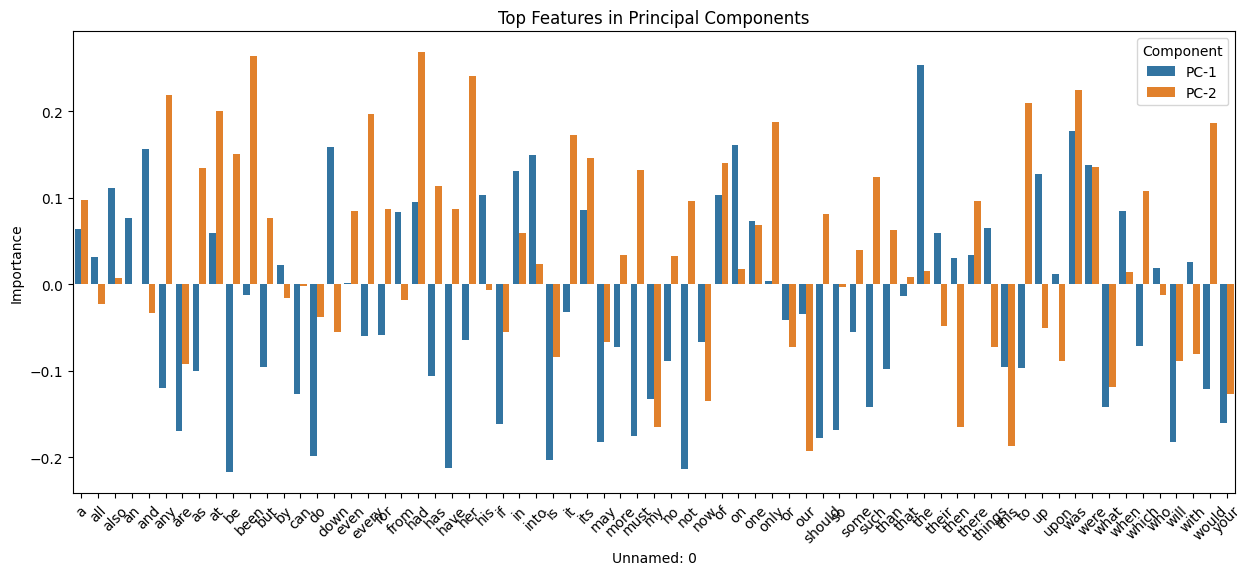

In [93]:
pca_top_features = pd.read_csv('pca_top_features.csv')
pca_melted_df = pca_top_features.melt(id_vars='Unnamed: 0', var_name='Component', value_name='Importance')
plt.figure(figsize=(15, 6))
sns.barplot(x='Unnamed: 0', y='Importance', hue='Component', data=pca_melted_df)
plt.title('Top Features in Principal Components')
plt.xticks(rotation=45)
plt.show()

* **Top Features**: The top features for PC-1 and PC-2 include 'a', 'all', 'also', 'an', 'and'.
* **Interpretation**: These principal components highlight again that common words have significant weights. It resonates with the findings from LDA and Word2Vec, emphasizing the role of commonly used words in the dataset.

### Silhouette Analysis

Why: While not directly indicating the important words, this method can help validate that the terms used in the feature set result in distinct and meaningful clusters.

In [94]:
# 5. Silhouette Analysis on best performing model (Hierarchical with 'ward')
Z = linkage(scaled_features, method='ward')

ward_clusters = fcluster(Z, t=4, criterion='maxclust')

silhouette_avg = silhouette_score(scaled_features, ward_clusters)

In [95]:
silhouette_avg

0.13833900164118343

* **Silhouette Score**: The average silhouette score is approximately 0.138.
* **Interpretation**: A silhouette score ranges from -1 to 1, where a high value indicates that the object is well-matched to its cluster and poorly matched to neighboring clusters. The score of 0.138 suggests that the clusters are neither too far away nor too close to each other, indicating a reasonable clustering solution but not a strongly separated one.

#### Overall Reflection

* **Commonality Across Methods**: All methods emphasize the importance of common words in clustering the texts. This result is intriguing because these are often considered 'noise' in text analytics.
* **Cluster Quality**: The Silhouette score suggests the clusters are reasonable but not strongly separated. This score could be because the common words picked up as important features could be more discriminative.
* **Nuances in Common Words**: The fact that common words are consistently highlighted across methods suggests they capture subtle stylistic elements unique to each author.

## Problem 4

#### Importing Libraries

In [96]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.covariance import GraphicalLasso

#### Data Loading &amp; Preprocessing

In [97]:
authors_df = pd.read_csv('authors.csv')

if 'Book ID' in authors_df.columns:
    authors_df.drop(['Book ID'], axis=1, inplace=True)

authors_df.rename(columns={'Unnamed: 0': 'Author'}, inplace=True)
features = authors_df.drop('Author', axis=1)
labels = authors_df['Author']

In [98]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

#### Create Network Graph for Graphical Lasso

In [99]:
model = GraphicalLasso()

model.fit(features)

graph_lasso = nx.Graph(model.precision_)

labels_lasso = {i: col for i, col in enumerate(features.columns)}

nx.relabel_nodes(graph_lasso, labels_lasso, copy=False)

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.108956335054245, tolerance: 33.07899007059324
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(


#### Create Network Graph for Correlation Matrix

In [100]:
correlation_matrix = features.corr()

graph_corr = nx.Graph(correlation_matrix.values)

labels_corr = {i: col for i, col in enumerate(correlation_matrix.columns)}

nx.relabel_nodes(graph_corr, labels_corr, copy=False)

#### Plot Both Graphs

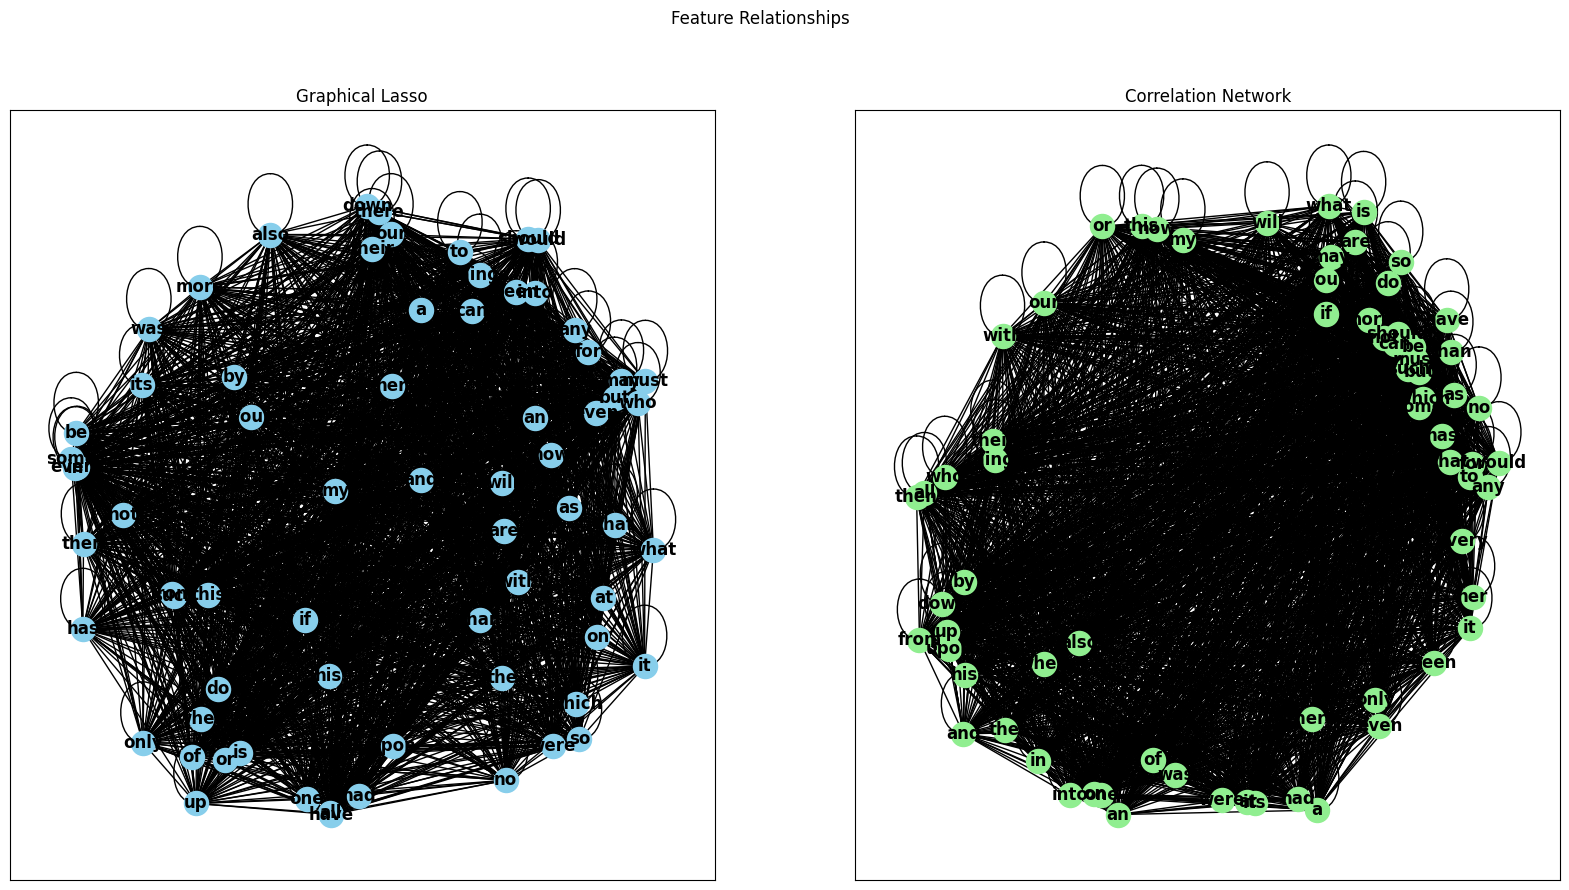

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
plt.suptitle('Feature Relationships')

nx.draw_networkx(graph_lasso, ax=ax[0], with_labels=True, font_weight='bold', node_color='skyblue')
ax[0].set_title('Graphical Lasso')

nx.draw_networkx(graph_corr, ax=ax[1], with_labels=True, font_weight='bold', node_color='lightgreen')
ax[1].set_title('Correlation Network')

plt.show()

#### Reflection &amp; Interpretation

##### Interpretation:

* **Graphical Lasso**: This can help you identify clusters of words often used together in a way not explained just by their frequencies. In other words, if two words are connected in this network, it's because something specific about the combination of those two words is notable.
* **Correlation Network**: This is a more straightforward measure, showing which words tend to be used together. Connections here don't necessarily indicate a unique relationship between the connected words; it could be an artifact of each commonly used word.

##### Reflection:

The Graphical Lasso model generally provides a more nuanced understanding of the relationships between features because it accounts for the influence of other features. The correlation network, on the other hand, is easier to understand but may include relationships that are better explained by other features.

# Theory &amp; Methods:

## Problem #6:
Develop an optimization algorithm to find a local solution to the Non-negative Matrix Factorization problem &amp; prove that it converges.

### Introduction

Non-negative Matrix Factorization (NMF) is used for approximating a given non-negative matrix $X$ as the product of two lower-rank non-negative matrices $W$ and $H$. The objective is to minimize the Frobenius norm of the difference between $X$ and $WH$.

### Objective Function

The optimization problem is framed as:

$\min_{W, H}\frac{1}{2}\| X - WH \|_2^2$

$\text{Subject to}\quad W_{ij}\geq 0,H_{ij}\geq0\quad\forall i,j$

### Why Multiplicative Update Rules?

Multiplicative update rules offer several advantages in the context of NMF:
- **Ease of Implementation**: The algorithm is easy to implement and doesn't require calculating gradients or choosing learning rates.
- **Local Convergence**: The algorithm is proven to converge to a local minimum or a stationary point.
- **Non-negative Constraints**: Multiplicative updates naturally enforce non-negativity constraints.
- **Scalability**: The algorithm is scalable for large datasets.

### Algorithm Details


#### Update Rules

The multiplicative update rules for $W$ and $H$ are:

##### Update Rule for $W$

$W \leftarrow W \odot \frac{ (XH^T) }{ (WHH^T + \epsilon) }$

##### Update Rule for \( H \)

$H \leftarrow H \odot \frac{ (W^TX) }{ (W^TWH + \epsilon) }$

Here, $\odot$ denotes element-wise multiplication, and $\epsilon$ is a small constant to prevent division by zero.

#### Pseudo-code

1. Initialize $W$ and $H$ with random non-negative values.
2. Set epsilon to a small constant (e.g., $1^{-10}$) to avoid division by zero.
3. Set max_iterations to the maximum number of iterations (e.g., $1000$).
4. For `iter` in `range(max_iterations)`:

    a. Calculate the numerator and denominator for updating $W$:
        Numerator: *X @ H.T*
        Denominator: *W @ H @ H.T + \epsilon*
    b. Update $W$ element-wise:
        $W *= Numerator / Denominator$
    c. Calculate the numerator and denominator for updating $H$:
        Numerator: $W.T @ X$
        Denominator: $W.T @ W @ H + \epsilon$
    d. Update $H$ element-wise:
        $H *= Numerator / Denominator$
5. Optionally, check for additional convergence criteria.
6. Return $W$ and $H$.

### Algorithm Implementation

Relative Reconstruction Error: 0.3348362203408778


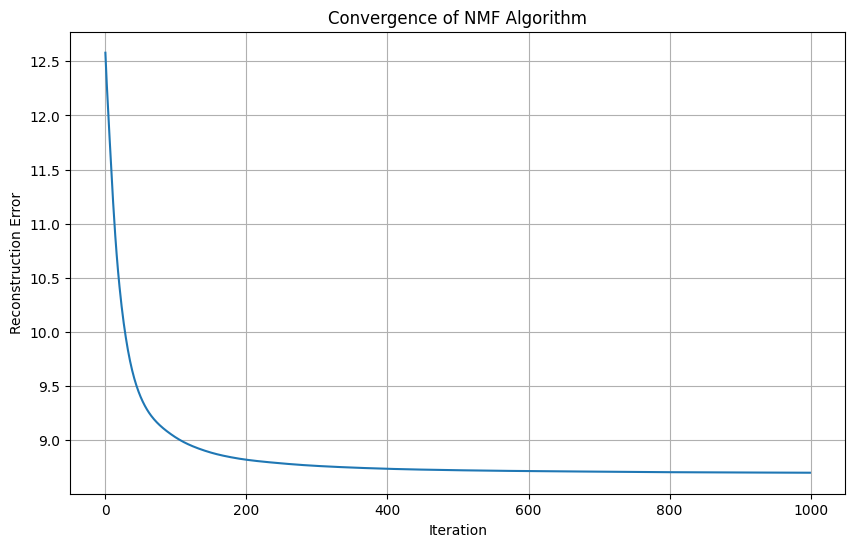

In [111]:
import numpy as np

def convergence_nmf(X, k, max_iterations=1000, epsilon=1e-10):
    """
    Non-negative Matrix Factorization using multiplicative update rules to prove local convergence.

    Args:
        X: Input matrix (m x n)
        k: Number of latent features
        max_iterations: Maximum number of iterations for the algorithm
        epsilon: Small constant to avoid division by zero

    Returns:
        W: m x k matrix
        H: k x n matrix
        errors: List of reconstruction errors at each iteration

    """
    errors = []
    m, n = X.shape

    # Step 1: Initialize W and H
    W = np.random.rand(m, k)
    H = np.random.rand(k, n)

    for i in range(max_iterations):
        # Calculate Numerator and Denominator for W
        denominator_W = W @ H @ H.T + epsilon
        numerator_W = X @ H.T

        # Update W
        W *= numerator_W / denominator_W

        # Calculate Numerator and Denominator for H
        denominator_H = W.T @ W @ H + epsilon
        numerator_H = W.T @ X

        # Update H
        H *= numerator_H / denominator_H

        errors.append(np.linalg.norm(X - W @ H, 'fro'))

    # Step 6: Return W and H
    return W, H, errors

# k = 10
# m, n = 50, 40
X = np.random.rand(50, 40)
W, H, errors = convergence_nmf(X, 10)
error = np.linalg.norm(X - W @ H, 'fro') / np.linalg.norm(X, 'fro')
print(f"Relative Reconstruction Error: {error}")

plt.figure(figsize=(10, 6))
plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('Reconstruction Error')
plt.title('Convergence of NMF Algorithm')
plt.grid(True)
plt.show()

## Problem #7:

Prove that classical (metric) Multi-Dimensional Scaling (MDS) with Euclidean distances is equivalent to Principal Component Analysis (PCA).


### Introduction

* MDS and PCA are both techniques used for dimensionality reduction
  * They are mathematically equivalent when MDS uses Euclidean distances
  * Even though they come from different fields and are often explained using different terminology

### Background

#### Multi-Dimensional Scaling (MDS)

MDS aims to map a set of points from a higher-dimensional space to a lower-dimensional space while preserving pairwise distances. Given a distance matrix \( D \) of pairwise distances between \( n \) points, MDS seeks \( n \) points \( y_1, y_2, ..., y_n \) in \( k \)-dimensional space such that the distances between these points approximate \( D \).

#### Principal Component Analysis (PCA)

PCA aims to find a lower-dimensional representation of a dataset that captures the most variance. Given a data matrix \( X \) of \( n \) observations and \( p \) variables, PCA finds \( k \) orthogonal vectors (principal components) to project the data onto, maximizing variance.

### Mathematical Steps for Equivalence

#### Step 1: Double Centering of MDS

Given the squared distance matrix $D$, the first step in classical MDS is to perform double centering.

This double centering results in a matrix $B$:

$ B = -\frac{1}{2} \left( I - \frac{1}{n} \mathbf{11}^T \right) D \left( I - \frac{1}{n} \mathbf{11}^T \right)$

#### Step 2: Eigen Decomposition of MDS

Perform eigen decomposition on $B$:

$B = V \Lambda V^T$

Choose the $k$ largest eigenvalues and their corresponding eigenvectors to form $\Lambda_k$ and $V_k$.

The lower-dimensional coordinates $Y$ are then given by:

$Y = V_k \Lambda_{k}^{1/2}$

#### Step 3: Covariance Matrix of PCA

For PCA, the first step is to calculate the covariance matrix $S$ after mean-centering the data $X$:

$S = \frac{1}{n} X^T X$

#### Step 4: Eigen Decomposition of PCA

Eigen decomposition is performed on $S$:

$S = W \Delta W^T$

Choose the $k$ largest eigenvalues and their corresponding eigenvectors to form $\Delta_k$ and $W_k$.

The lower-dimensional coordinates $Z$ are:

$Z = X W_k$

#### Step 5: Establishing Equivalence

* The matrices $B$ and $S$ are equivalent up to a scaling factor.
  * Their eigenvalues and eigenvectors will also be equivalent.
    * Therefore, the $Y$ and $Z$ computed from MDS and PCA will be identical up to a rotation or reflection.

### Conclusion

Despite the differences in their initial formulations and objectives, classical MDS (with Euclidean distances) and PCA are mathematically equivalent. This equivalence allows for the interchangeable use of these methods, depending on the context of the problem at hand.

## Problem #8:

Prove that centroid linkage in hierarchical clustering can result in inversions in the dendrogram.

### Introduction

* In hierarchical clustering, the dendrogram represents the sequence of merges between clusters.
* An dendrogram inversion refers to a situation where two clusters $A$ and $B$ merge before each of them merges with a third cluster $C$
    * even though $C$ is closer to either $A$ or $B$ than they are to each other.

### Background

Centroid linkage defines the distance between two clusters $A$ and $B$ as the distance between their centroids.

Specifically, if $\text{centroid}(A)$ and $\text{centroid}(B)$ are the centroids of clusters $A$ and $B$ respectively, then the distance $d(A, B)$ between $A$ and $B$ is:

$d(A, B) = \text{distance}(\text{centroid}(A), \text{centroid}(B))$

* Inversions can occur in centroid linkage due to the phenomenon known as the "centroid effect".

* This phenomenon happens when the centroids of two clusters are closer together than any individual point in a third cluster, even though that third cluster might be closer to one of the original clusters when considering individual points (as mentioned in introduction).

### Proof

Let's consider a concrete example with three clusters $A$, $B$, and $C$ in a 1D space to illustrate this.

Suppose we have:

- $A = \{1, 5\}$ with centroid, $\text{centroid}(A) = 3$
- $B = \{9, 15\}$ with centroid, $\text{centroid}(B) = 12$
- $C = \{6\}$ with centroid, $\text{centroid}(C) = 6$

Using the Euclidean distance, we have:

$d(A, B) = |3 - 12| = 9$

$d(A, C) = |3 - 6| = 3$

$d(B, C) = |12 - 6| = 6$

Here, $C$ is closer to $A$ and $B$ than $A$ and $B$ are to each other, based on individual points.

However, if we were to merge $A$ and $B$ first, the new centroid would be:

$\text{centroid}(A \cup B) = \frac{1 + 5 + 9 + 15}{4} = \frac{30}{4} = 7.5$

* Now, the distance from $A \cup B$ to $C$ is $|7.5 - 6| = 1.5$, which is indeed smaller than the original distances between $A$ and $C$ or $B$ and $C$

* Even though $C$ was closer to $A$ and $B$ individually, the centroid effect led to $A$ and $B$ merging first, causing an inversion in the dendrogram

This basic example demonstrates that centroid linkage in hierarchical clustering can result in inversions in the dendrogram.

# Time End

In [103]:
time.perf_counter() - start_time

371.05002820000004